In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [21]:
train = pd.read_csv(r"C:\Users\sacar\Downloads\train_data.csv")

C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\1598594696.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r"C:\Users\sacar\Downloads\train_data.csv")


In [22]:
train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [23]:
train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [25]:
train.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


# Individual feature analysis
- `WCIO Cause of Injury Code` (Codes representing cause of injury)
- `WCIO Cause of Injury Description` (Description of codes representing cause of injury)
- `WCIO Nature of Injury Code` (Codes representing descriptions of the sustained injury)
- `WCIO Nature of Injury Description` (Description of codes representing cause of injury)
- `WCIO Part Of Body Code` (Codes representing body part injured)
- `WCIO Part Of Body Description` (Description of codes representing body part injured)

# WCIO Cause of Injury Code

**Description**:  
These codes are numerical values that correspond to specific descriptions of injury causes.

### **Recommendation**:  
- **Convert the codes to string type for consistency.**  
- **Retain any missing values (NAs) as is.**

### Strange Values:  
- None identified.

### Number of NAs:  
- 35,085 missing values.

### Feature Engineering:  
- Bucket the values by injury type into a new column (`Cause of Injury Bucket`).

  **Reference**:  
  - [WCIO Cause of Injury Codes](https://www.dir.ca.gov/dwc/WCIS/Cause_Of_Injury.pdf)


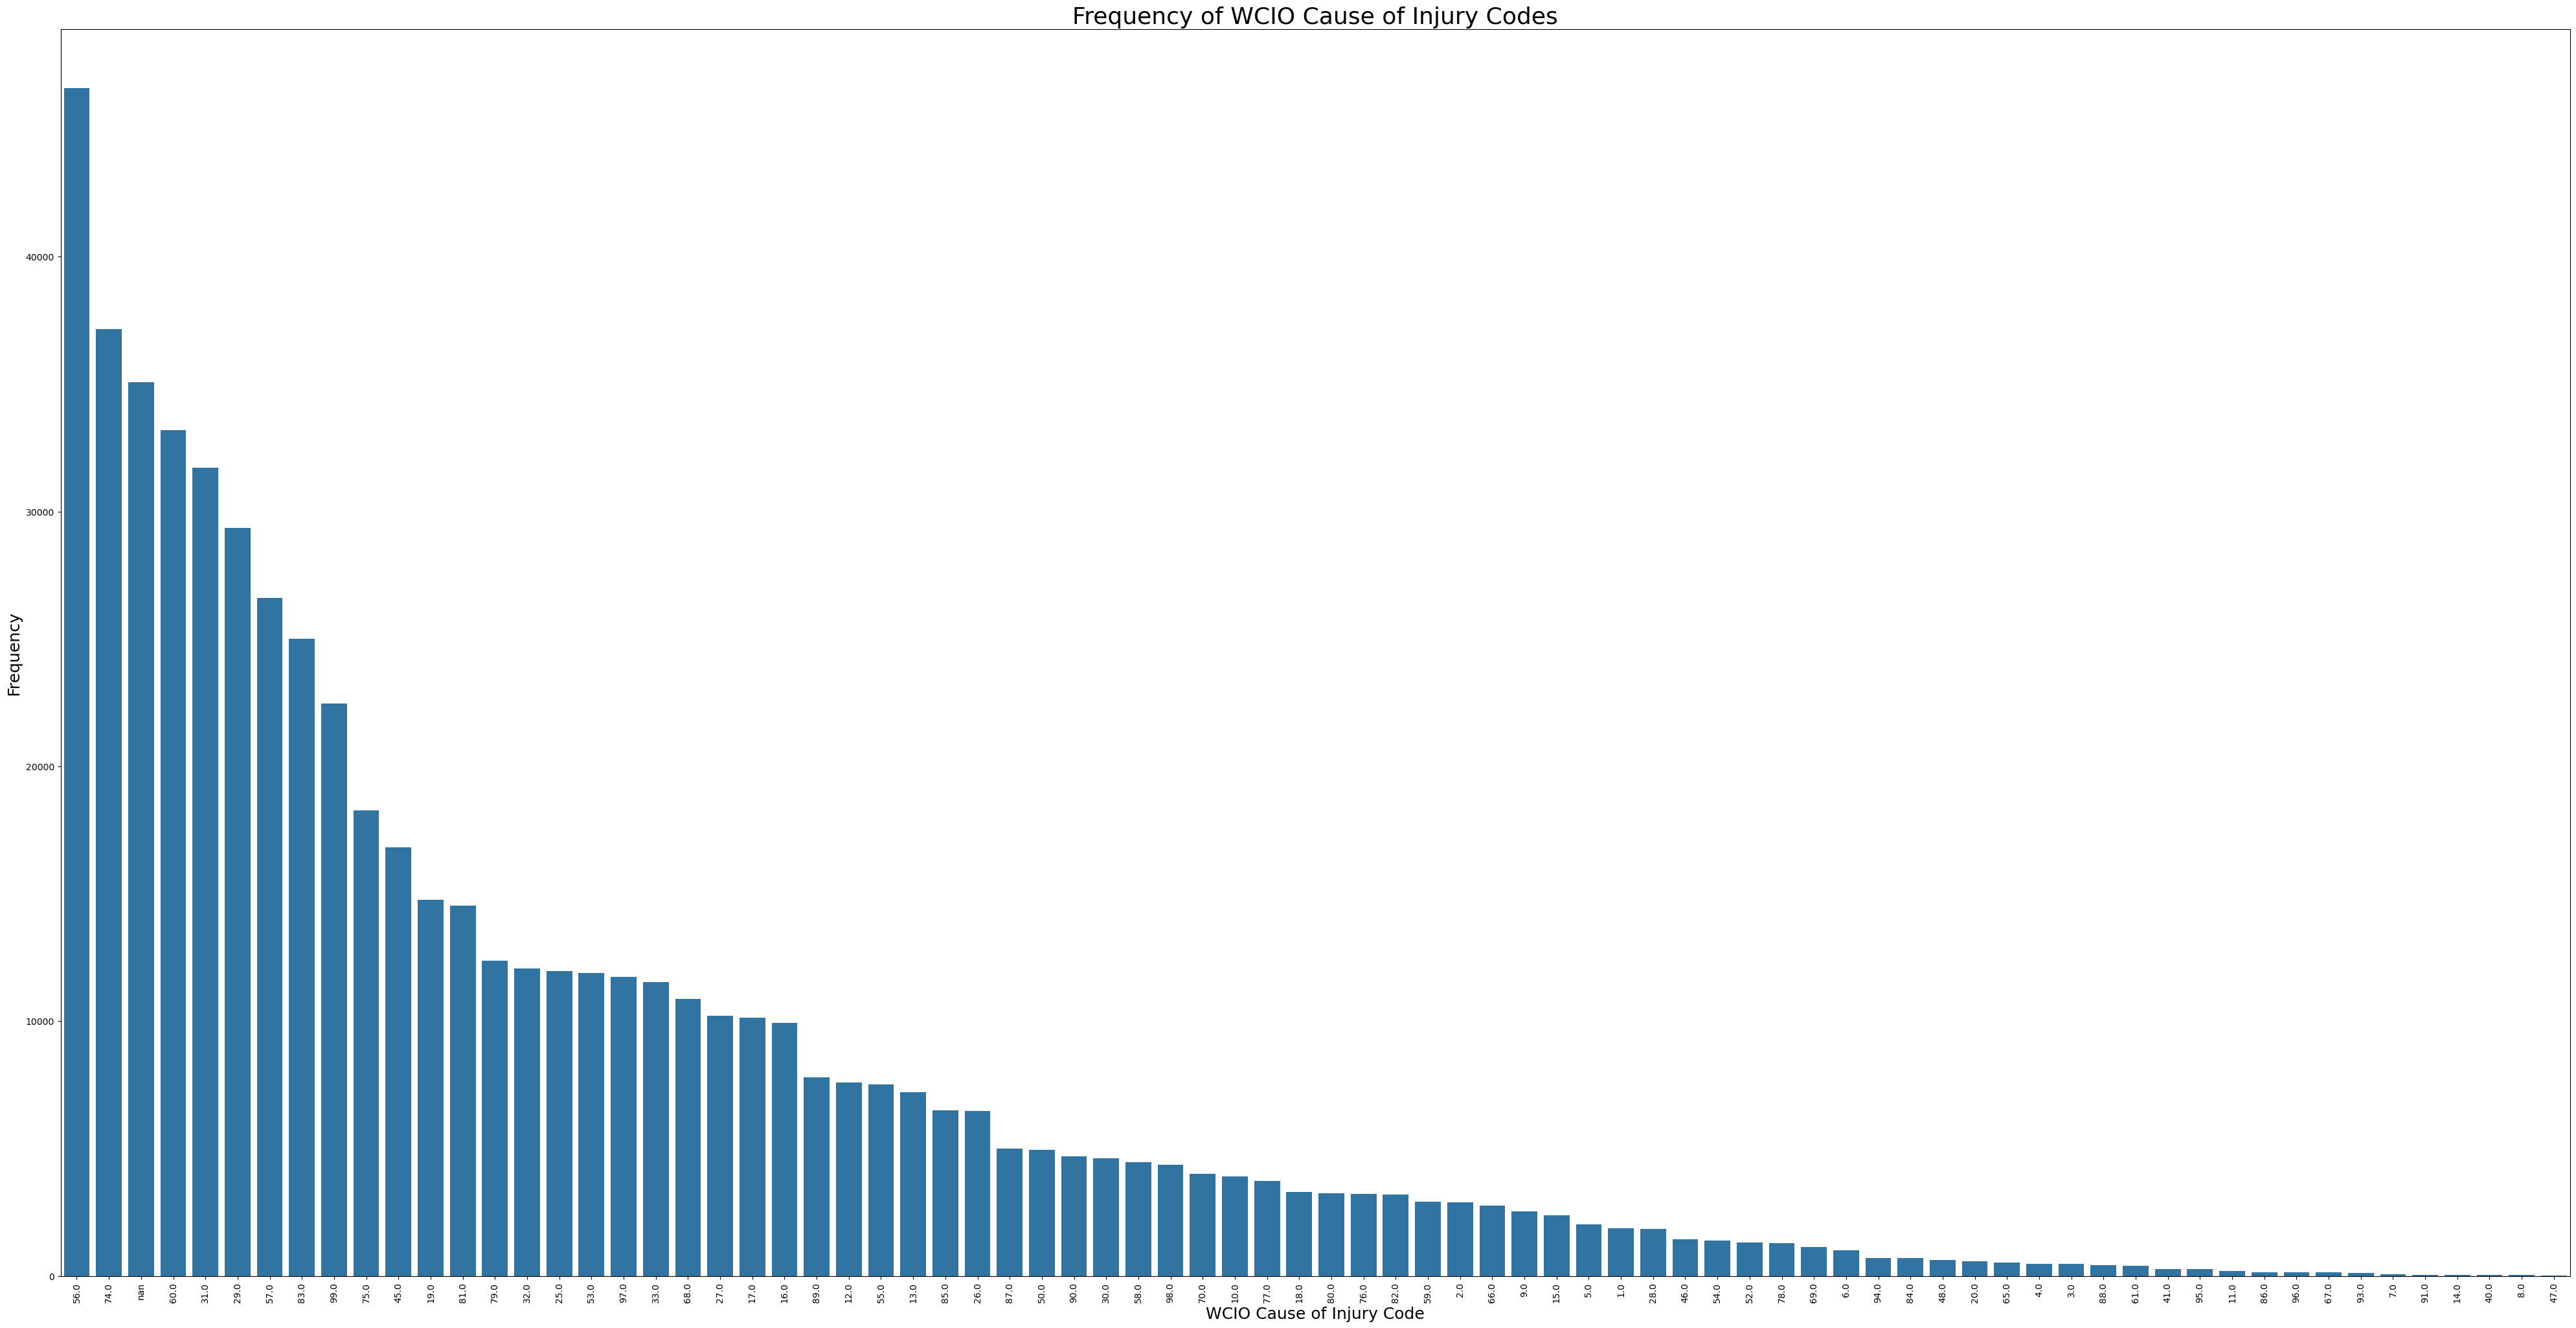

35085

In [58]:
#convert cause_of_injury_code column to string
wcio_cause_injury_code = train['WCIO Cause of Injury Code'].astype(str) 

#Calculate frequency of each value
cause_injury_code_order = wcio_cause_injury_code.value_counts().index

#plot bar graph of wcio_cause_of_injury
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_cause_injury_code, order=cause_injury_code_order)
plt.xlabel('WCIO Cause of Injury Code', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Cause of Injury Codes', fontsize=26)
plt.xticks(rotation=90,)  # Rotate x labels if they are long
plt.show()

#replace empty strings with null values and count the total
wcio_cause_injury_code.replace("nan", np.nan, inplace=True)
wcio_cause_injury_code.isna().sum()



# WCIO Cause of Injury Description

**Description**:  
These are descriptions that correspond to the Cause of Injury Codes.

### **Recommendation**:  
- **Drop this column due to redundancy with injury codes.**

### Strange Values:  
- None identified.

### Number of NAs:  
- 35,085 missing values.

### Feature Engineering:  
- None needed.


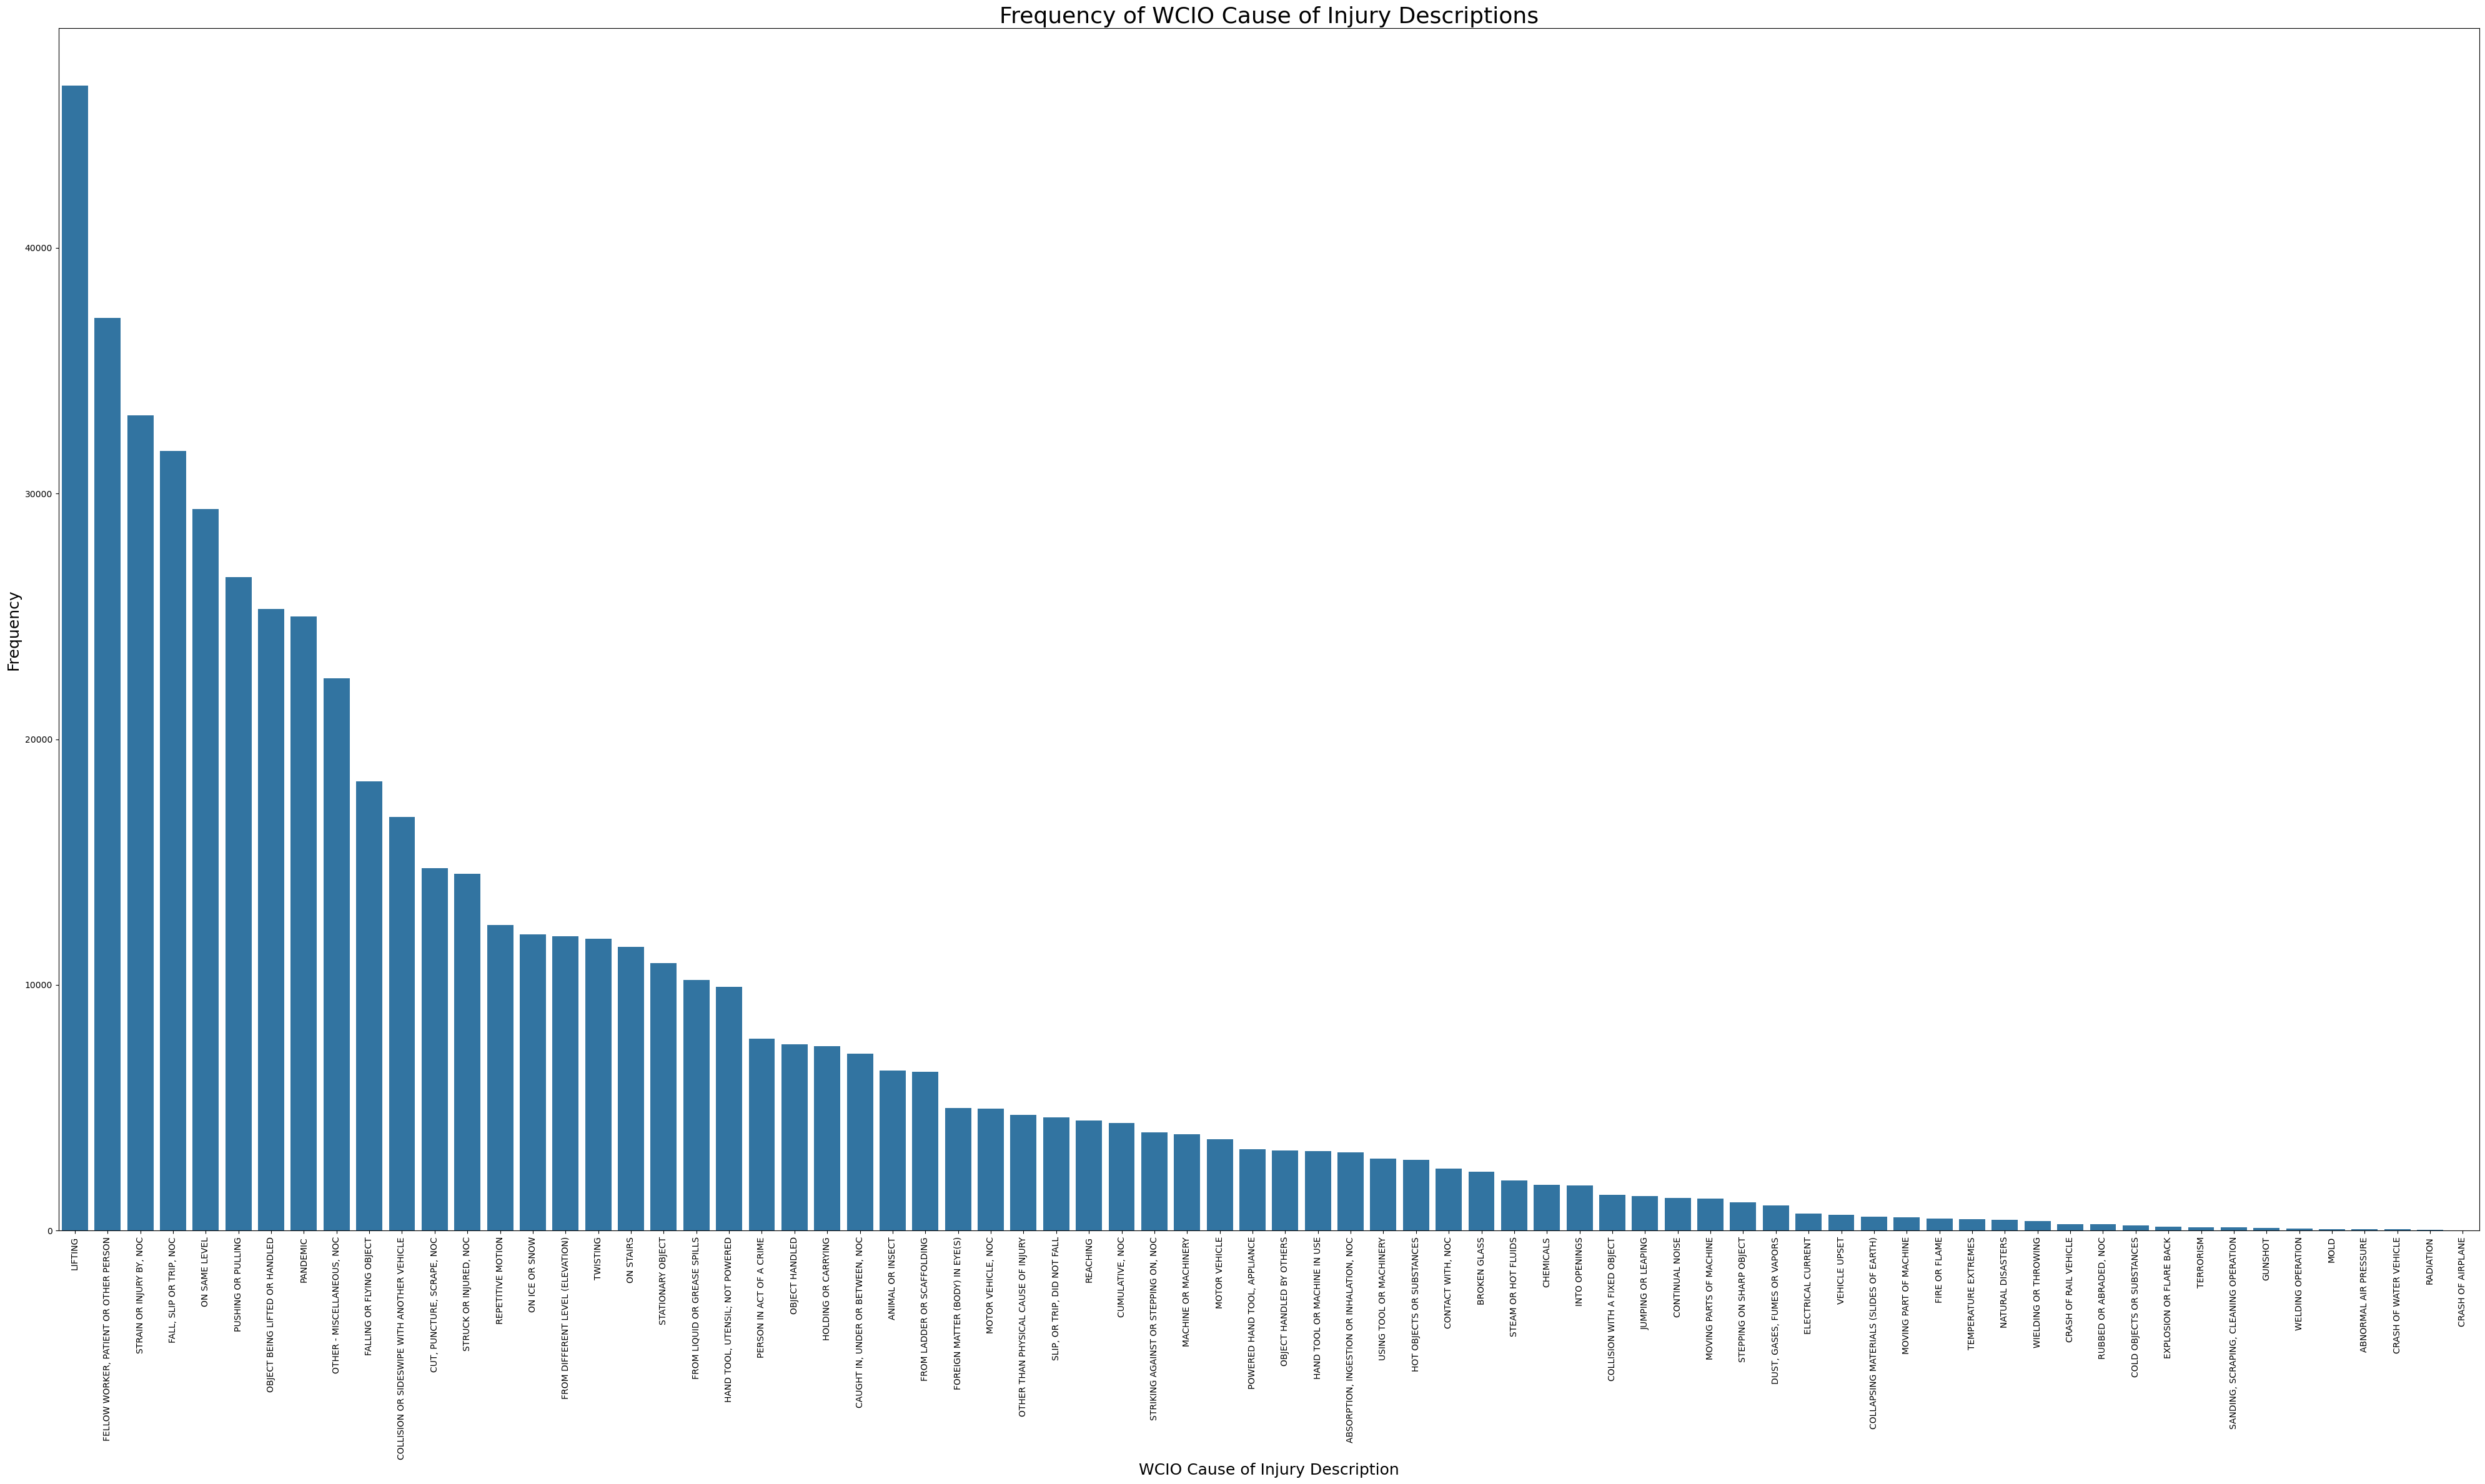

In [61]:
#grab cause of injury descriptions
wcio_cause_injury_code_desc = train['WCIO Cause of Injury Description']

#Calculate frequency of each value
cause_injury_code_desc_order = wcio_cause_injury_code_desc.value_counts().index

#plot bar graph of cause of injury descriptions
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_cause_injury_code_desc, order=cause_injury_code_desc_order)
plt.xlabel('WCIO Cause of Injury Description', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Cause of Injury Descriptions', fontsize=26)
plt.xticks(rotation=90,) 
plt.show()

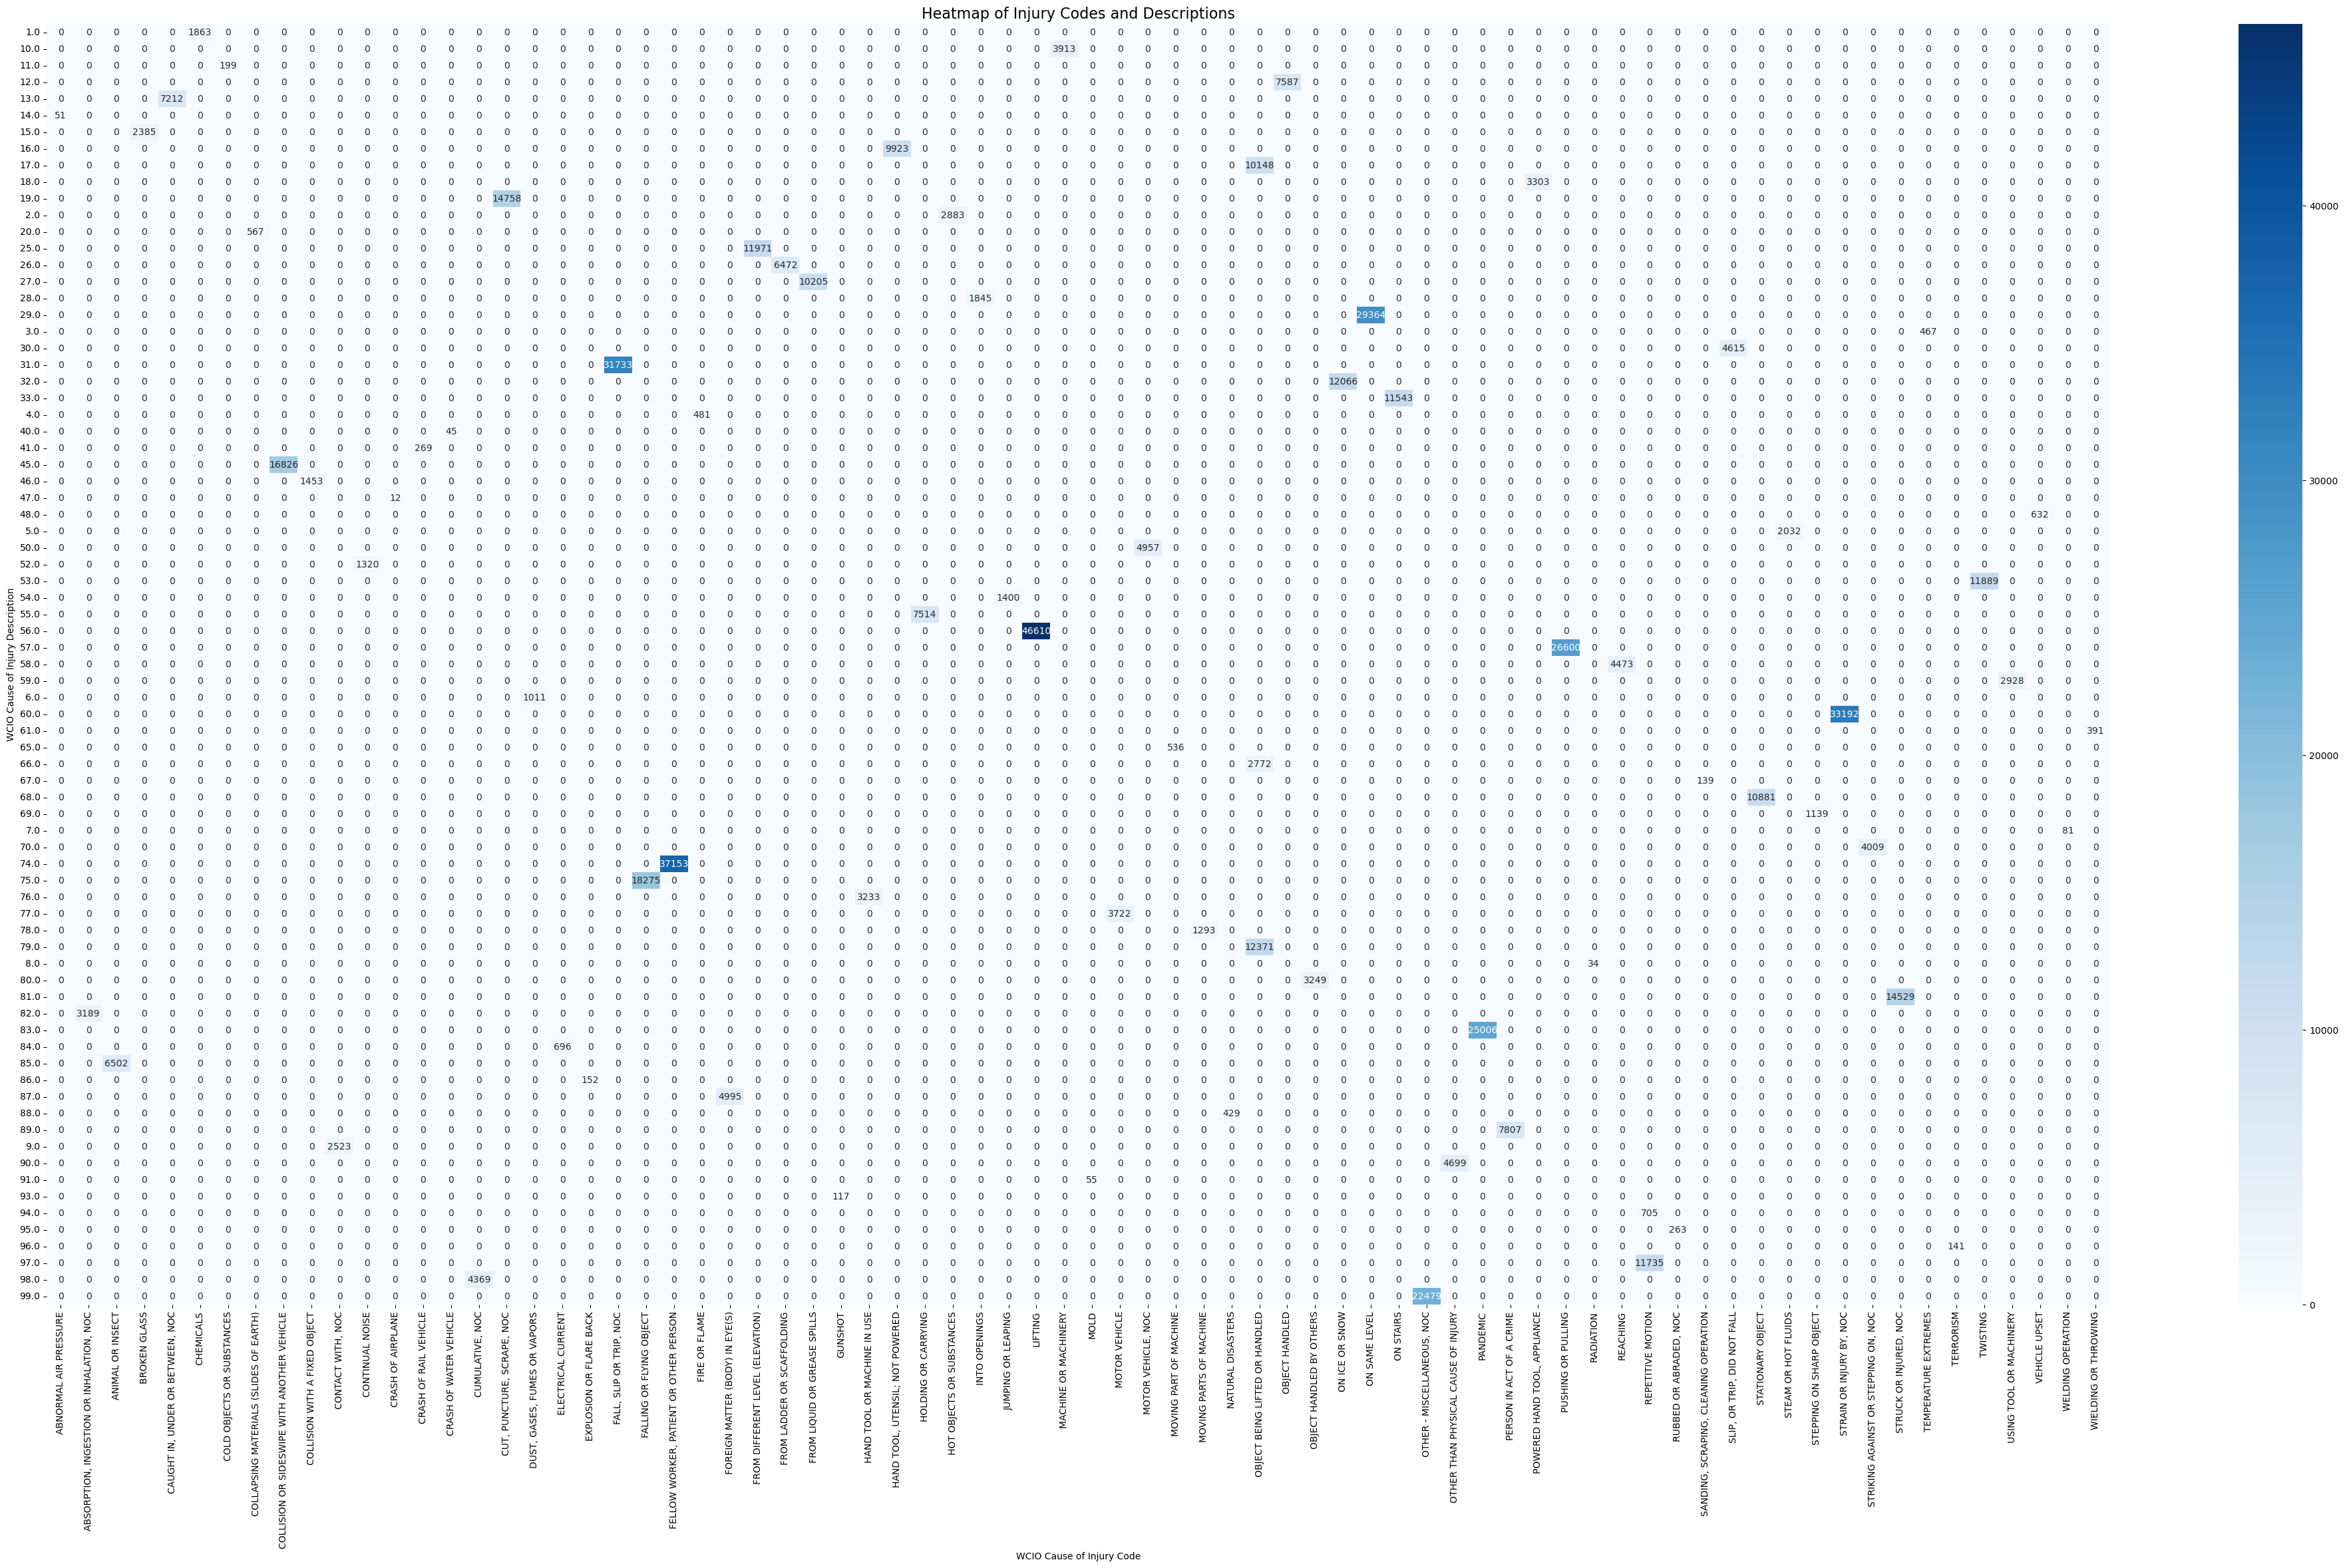

,cause_Injury_code,cause_Injury_desc


In [28]:
#create a dataframe of wcio cause injury codes and descriptions
injury_code_and_descriptions = df = pd.DataFrame({
    'cause_Injury_code': wcio_cause_injury_code,
    'cause_Injury_desc': wcio_cause_injury_code_desc
})

#create pivot table with injury code as the index and injury descriptions as the columns
pivot_table = injury_code_and_descriptions.pivot_table(index='cause_Injury_code', 
                                columns='cause_Injury_desc', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(50, 25))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Injury Codes and Descriptions', fontsize=16)
plt.xlabel('WCIO Cause of Injury Code')
plt.ylabel('WCIO Cause of Injury Description')

plt.show()

#check for rows where injury code is NA, but there is an injury description
#There are no rows that meet this condition, so there isn't any info to be gained by the injury description column
injury_code_and_descriptions[(injury_code_and_descriptions['cause_Injury_code'].isna()) & (injury_code_and_descriptions['cause_Injury_desc'].notna())]

In [46]:
#Create buckets for cause_injury_codes

# Initialize the new 'Cause of Injury Bucket' column with None
train['Cause of Injury Bucket'] = None

# 1 - Temp (Codes 1-9, 11, 14, 84)
train.loc[train['WCIO Cause of Injury Code'].between(1.0, 9.0) | train['WCIO Cause of Injury Code'].isin([11.0, 14.0, 84.0]), 'Cause of Injury Bucket'] = "1 - Temp"

# 2 - Caught (Codes 10, 12, 13, 20)
train.loc[train['WCIO Cause of Injury Code'].isin([10.0, 12.0, 13.0, 20.0]), 'Cause of Injury Bucket'] = "2 - Caught"

# 3 - Cut (Codes 15-19)
train.loc[train['WCIO Cause of Injury Code'].between(15.0, 19.0), 'Cause of Injury Bucket'] = "3 - Cut"

# 4 - Fall (Codes 25-33)
train.loc[train['WCIO Cause of Injury Code'].between(25.0, 33.0), 'Cause of Injury Bucket'] = "4 - Fall"

# 5 - Motor Vehicle (Codes 40-41, 45-48, 50)
train.loc[train['WCIO Cause of Injury Code'].isin([40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0]), 'Cause of Injury Bucket'] = "5 - Motor Vehicle"

# 6 - Strain (Codes 52-61, 97)
train.loc[train['WCIO Cause of Injury Code'].between(52.0, 61.0) | train['WCIO Cause of Injury Code'].isin([97.0]), 'Cause of Injury Bucket'] = "6 - Strain"

# 7 - Striking (Codes 65-70)
train.loc[train['WCIO Cause of Injury Code'].between(65.0, 70.0), 'Cause of Injury Bucket'] = "7 - Striking"

# 8 - Struck (Codes 74-81, 85-86)
train.loc[train['WCIO Cause of Injury Code'].between(74.0, 81.0) | train['WCIO Cause of Injury Code'].between(85.0, 86.0), 'Cause of Injury Bucket'] = "8 - Struck"

# 9 - Rubbed (Codes 94, 95)
train.loc[train['WCIO Cause of Injury Code'].isin([94.0, 95.0]), 'Cause of Injury Bucket'] = "9 - Rubbed"

# 10 - Miscellaneous (Codes 82-83, 87-91, 93, 96, 98-99)
train.loc[train['WCIO Cause of Injury Code'].between(82.0, 91.0) | train['WCIO Cause of Injury Code'].isin([93.0, 96.0, 98.0, 99.0]), 'Cause of Injury Bucket'] = "10 - Miscellaneous"



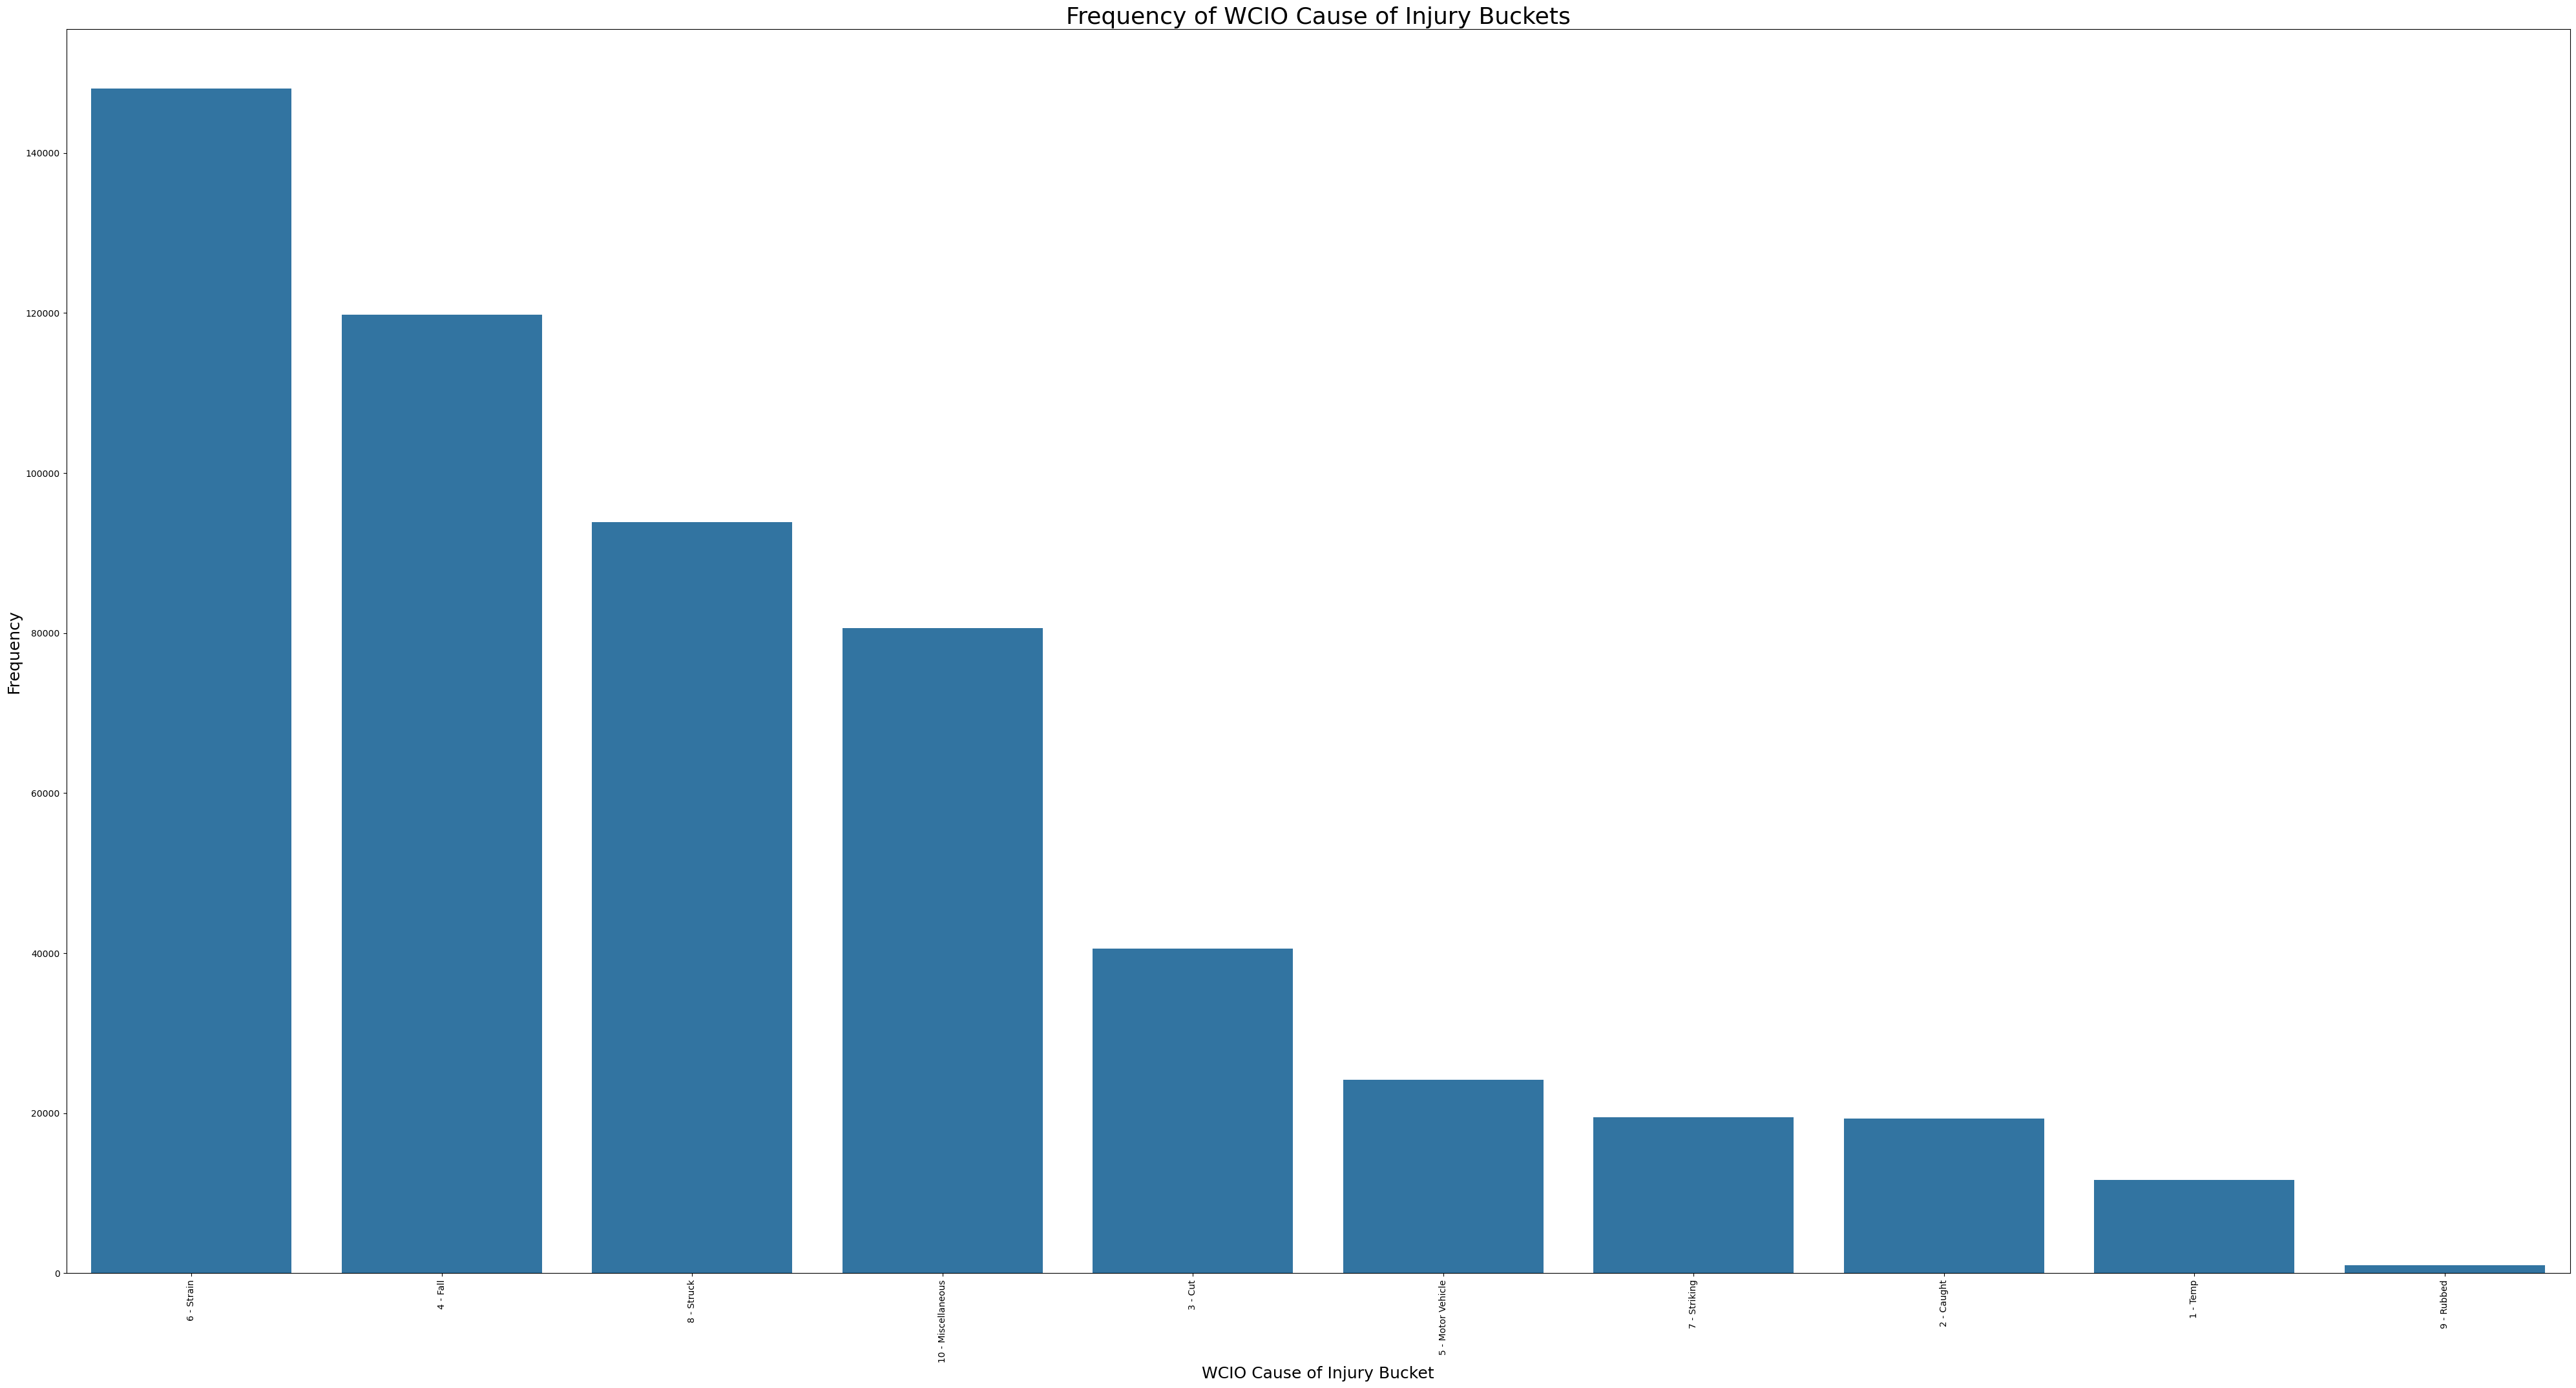

In [62]:
#Calculate frequency of each value
injury_code_bucket_order = train['Cause of Injury Bucket'].value_counts().index

#plot of injury code buckets
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_cause_injury_bucket, order=injury_code_bucket_order)
plt.xlabel('WCIO Cause of Injury Bucket', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Cause of Injury Buckets', fontsize=26)
plt.xticks(rotation=90,)  # Rotate x labels 
plt.show()


# WCIO Nature of Injury Code

**Description**:  
These codes are numbers that correspond to specific descriptions of injuries.

### **Recommendation**:  
- **Convert the codes to string type for consistency.**  
- **Leave NAs as is.**

### Strange Values:  
- None identified.

### Number of NAs:  
- 35,102 missing values.

### Feature Engineering:  
- Create a new `Cause of Injury Bucket` column.

  **Reference**:  
  - [WCIO Nature of Injury Codes](https://www.dir.ca.gov/dwc/WCIS/Nature_Of_Injury.pdf)


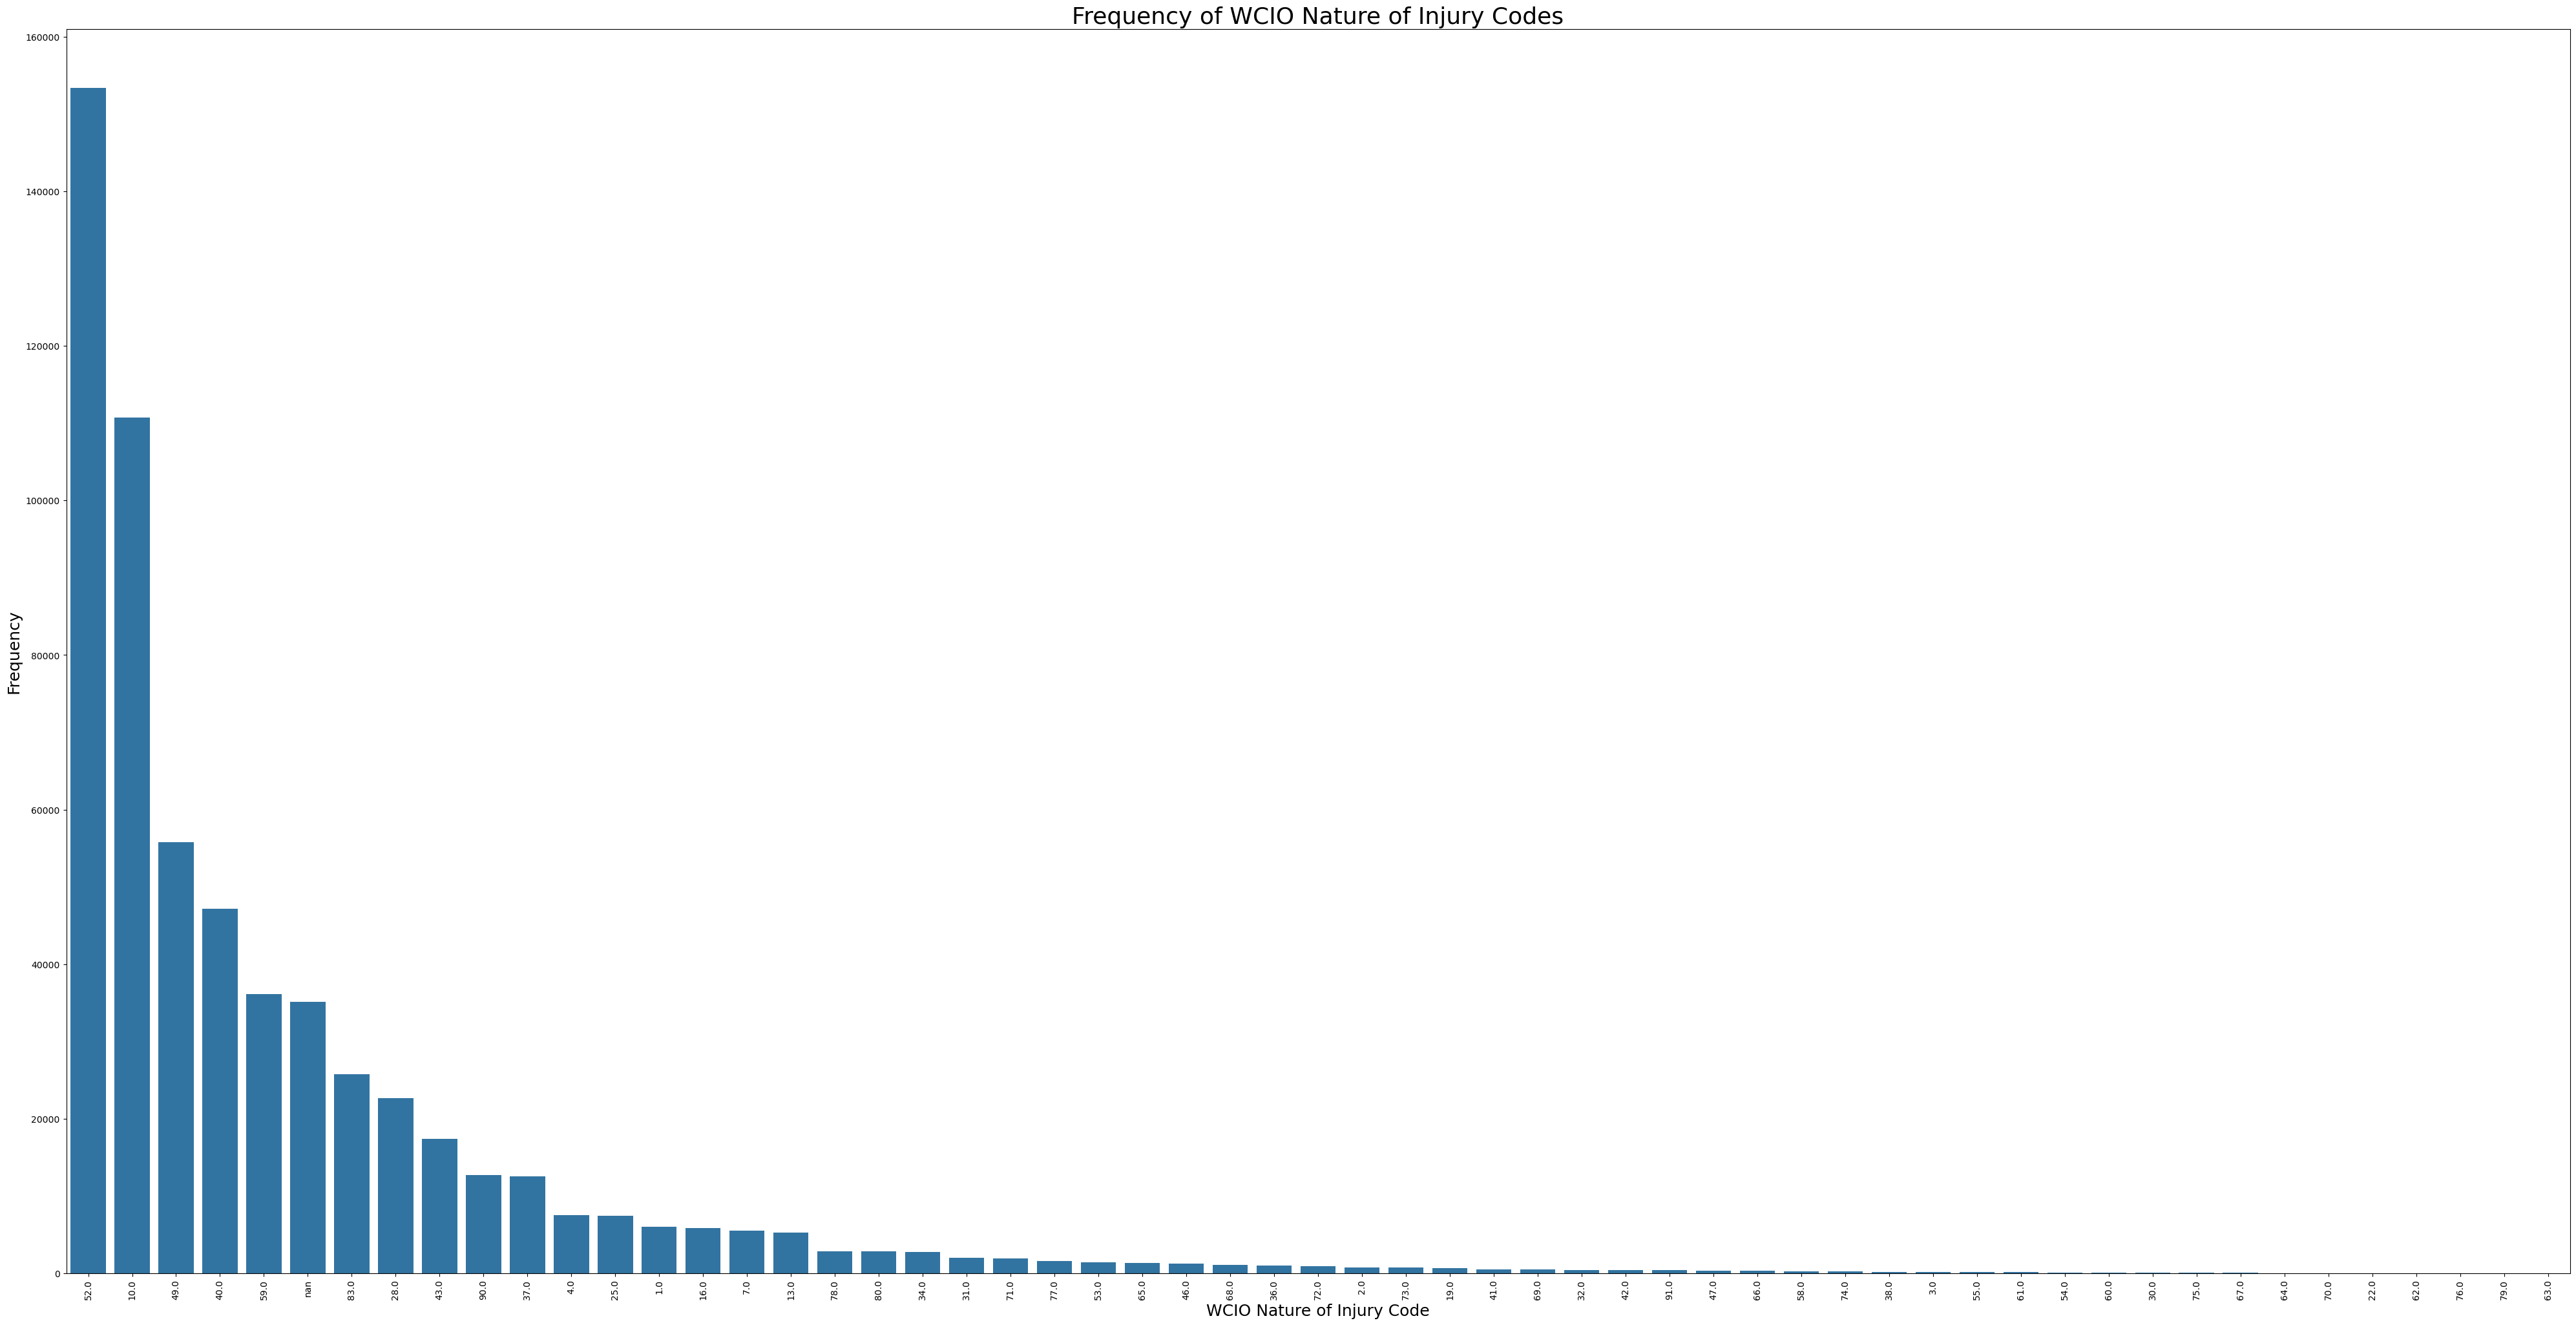

35102

In [57]:
#convert nature of injury codes to string
wcio_nature_injury_code = train['WCIO Nature of Injury Code'].astype(str) #convert to string

#Calculate frequency of each value
injury_code_order = wcio_nature_injury_code.value_counts().index

#plot nature of injury codes
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_nature_injury_code, order=injury_code_order)
plt.xlabel('WCIO Nature of Injury Code', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Nature of Injury Codes', fontsize=26)
plt.xticks(rotation=90,)  # Rotate x labels
plt.show()

#check for rows where injury code is NA, but there is an injury description
#There are no rows that meet this condition, so there isn't any info to be gained by the injury description column
wcio_nature_injury_code.replace("nan", np.nan, inplace=True)
wcio_nature_injury_code.isna().sum()

# WCIO Nature of Injury Description

**Description**:  
These are descriptions that correspond to the Nature of Injury Codes.

### **Recommendation**:  
- **Drop this column due to redundancy with injury codes.**

### Strange Values:  
- None identified.

### Number of NAs:  
- 35,102 missing values.

### Feature Engineering:  
- None needed.


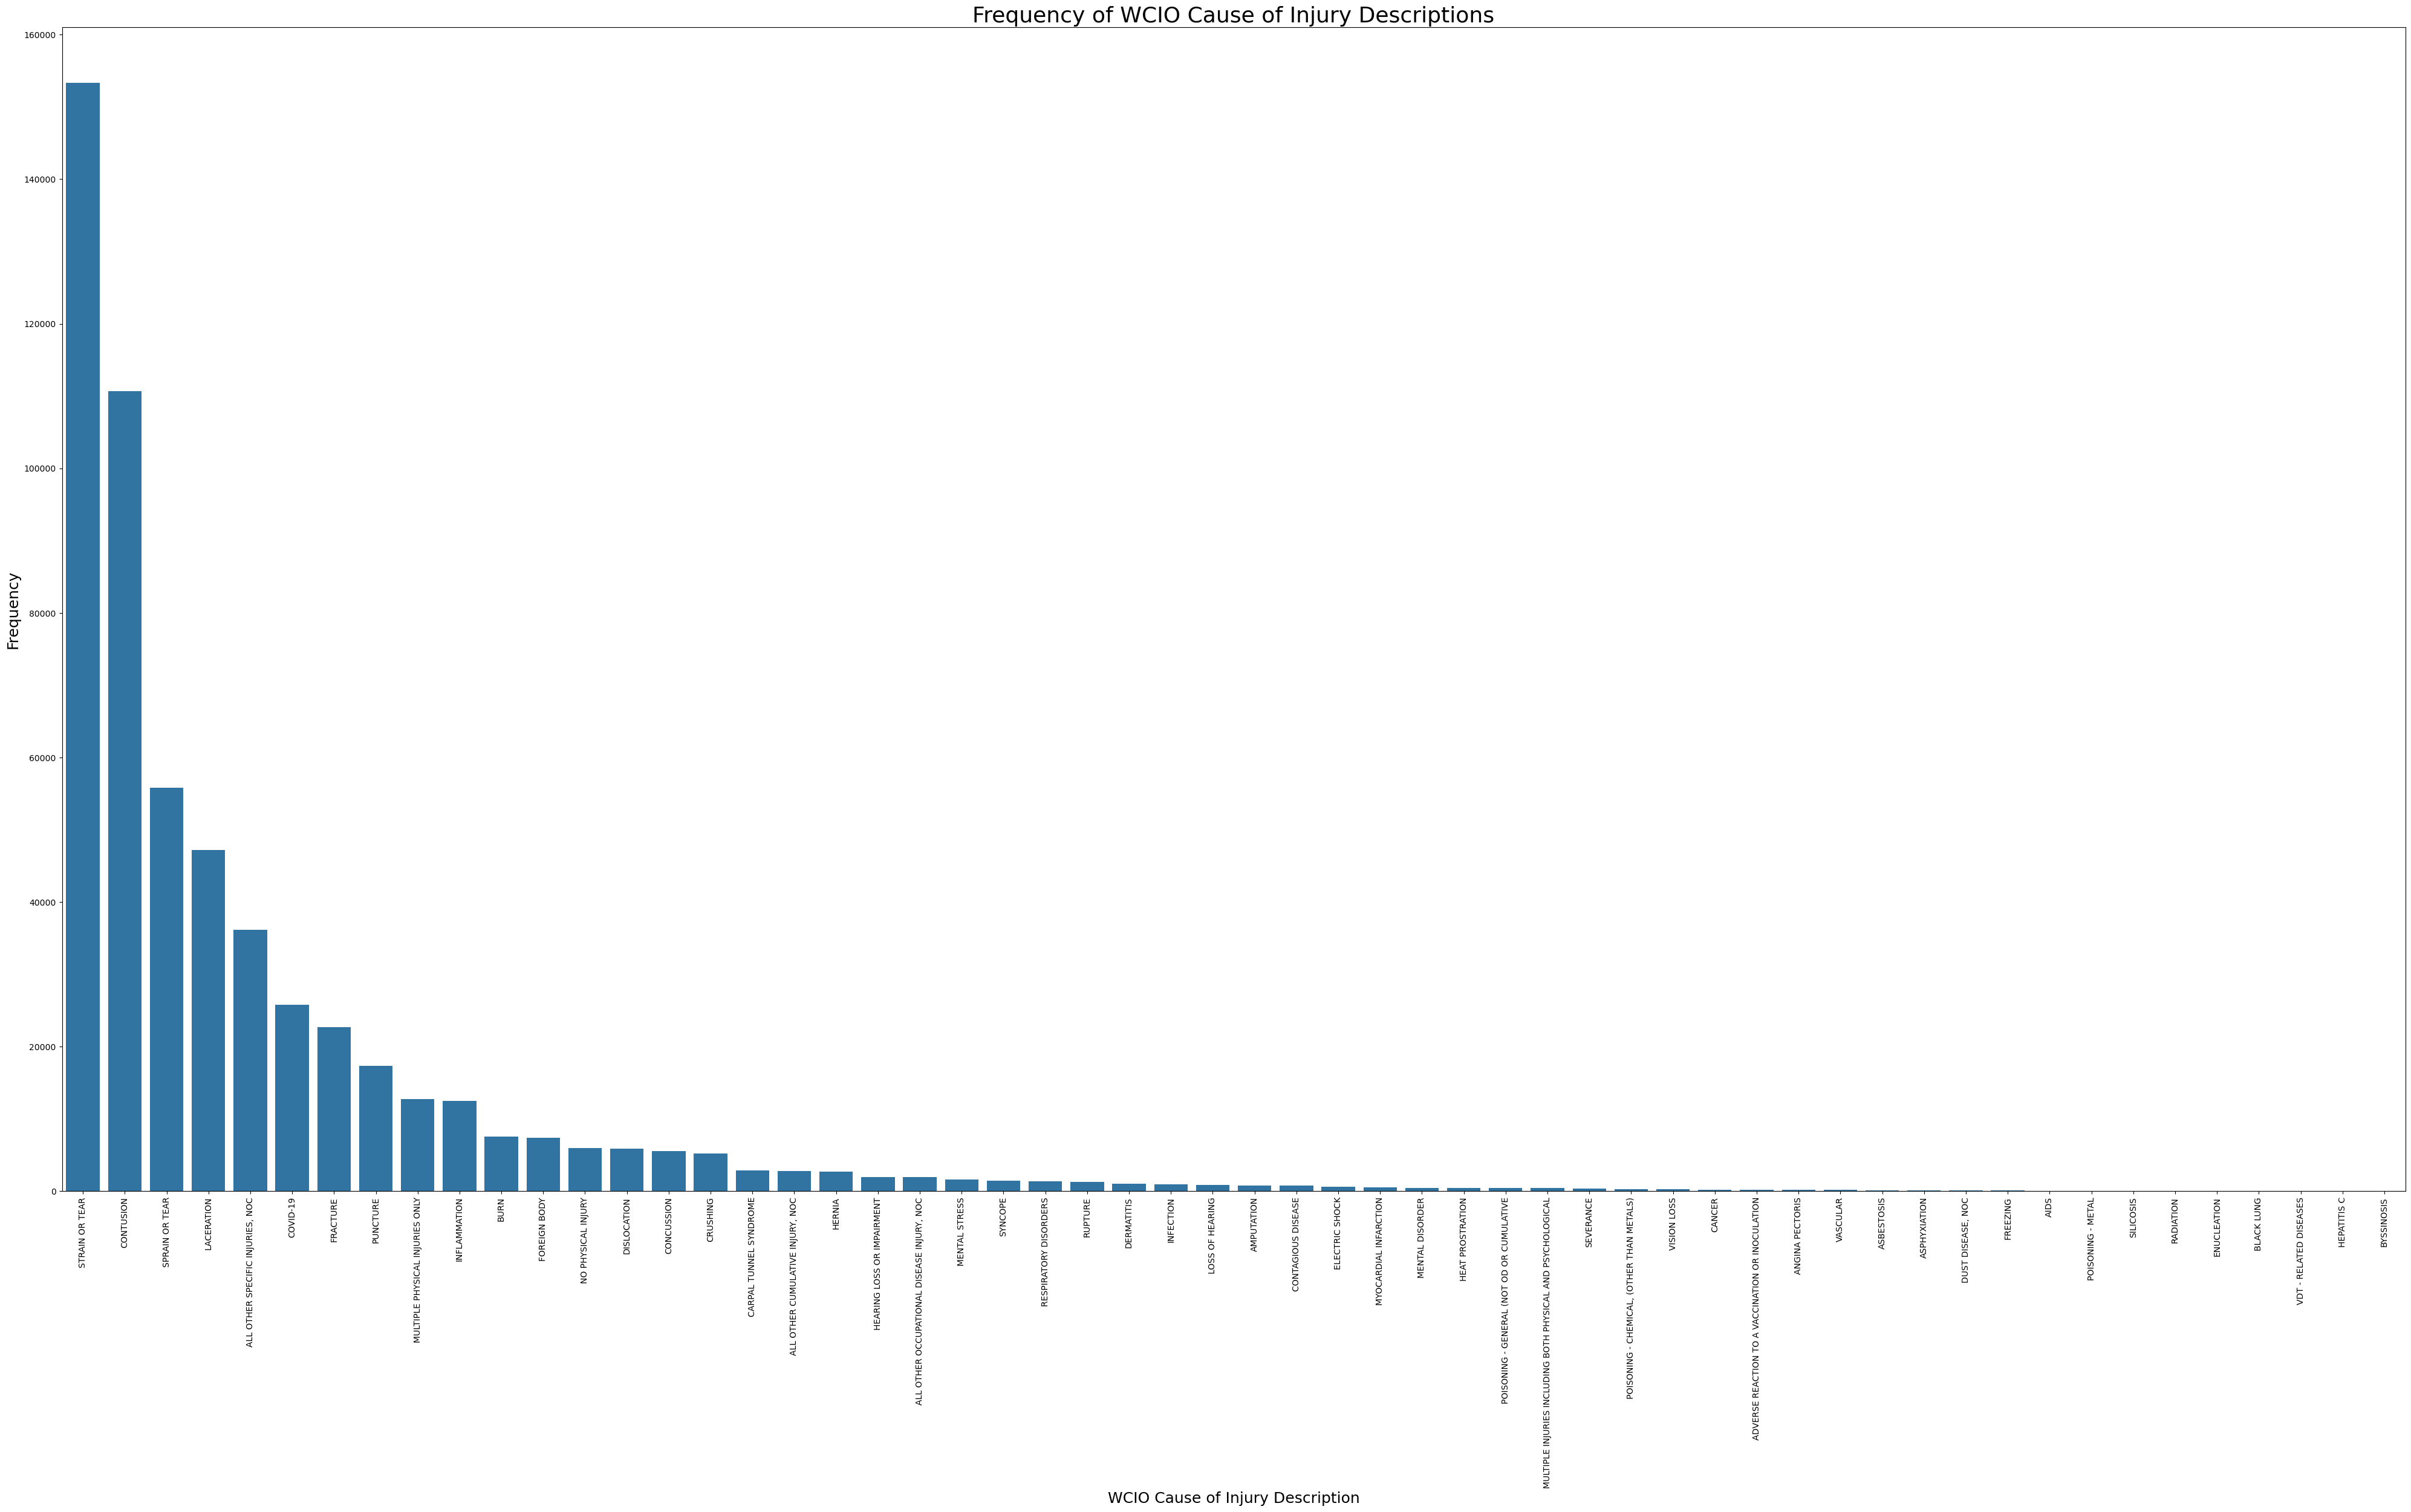

In [63]:
#grab injury code descriptions
wcio_nature_injury_code_desc = train['WCIO Nature of Injury Description']

#Calculate frequency of each value
nature_injury_code_desc_order = wcio_nature_injury_code_desc.value_counts().index

#plot bar graph of injury descriptions
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_nature_injury_code_desc, order=nature_injury_code_desc_order)
plt.xlabel('WCIO Cause of Injury Description', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Cause of Injury Descriptions', fontsize=26)
plt.xticks(rotation=90,)  
plt.show()

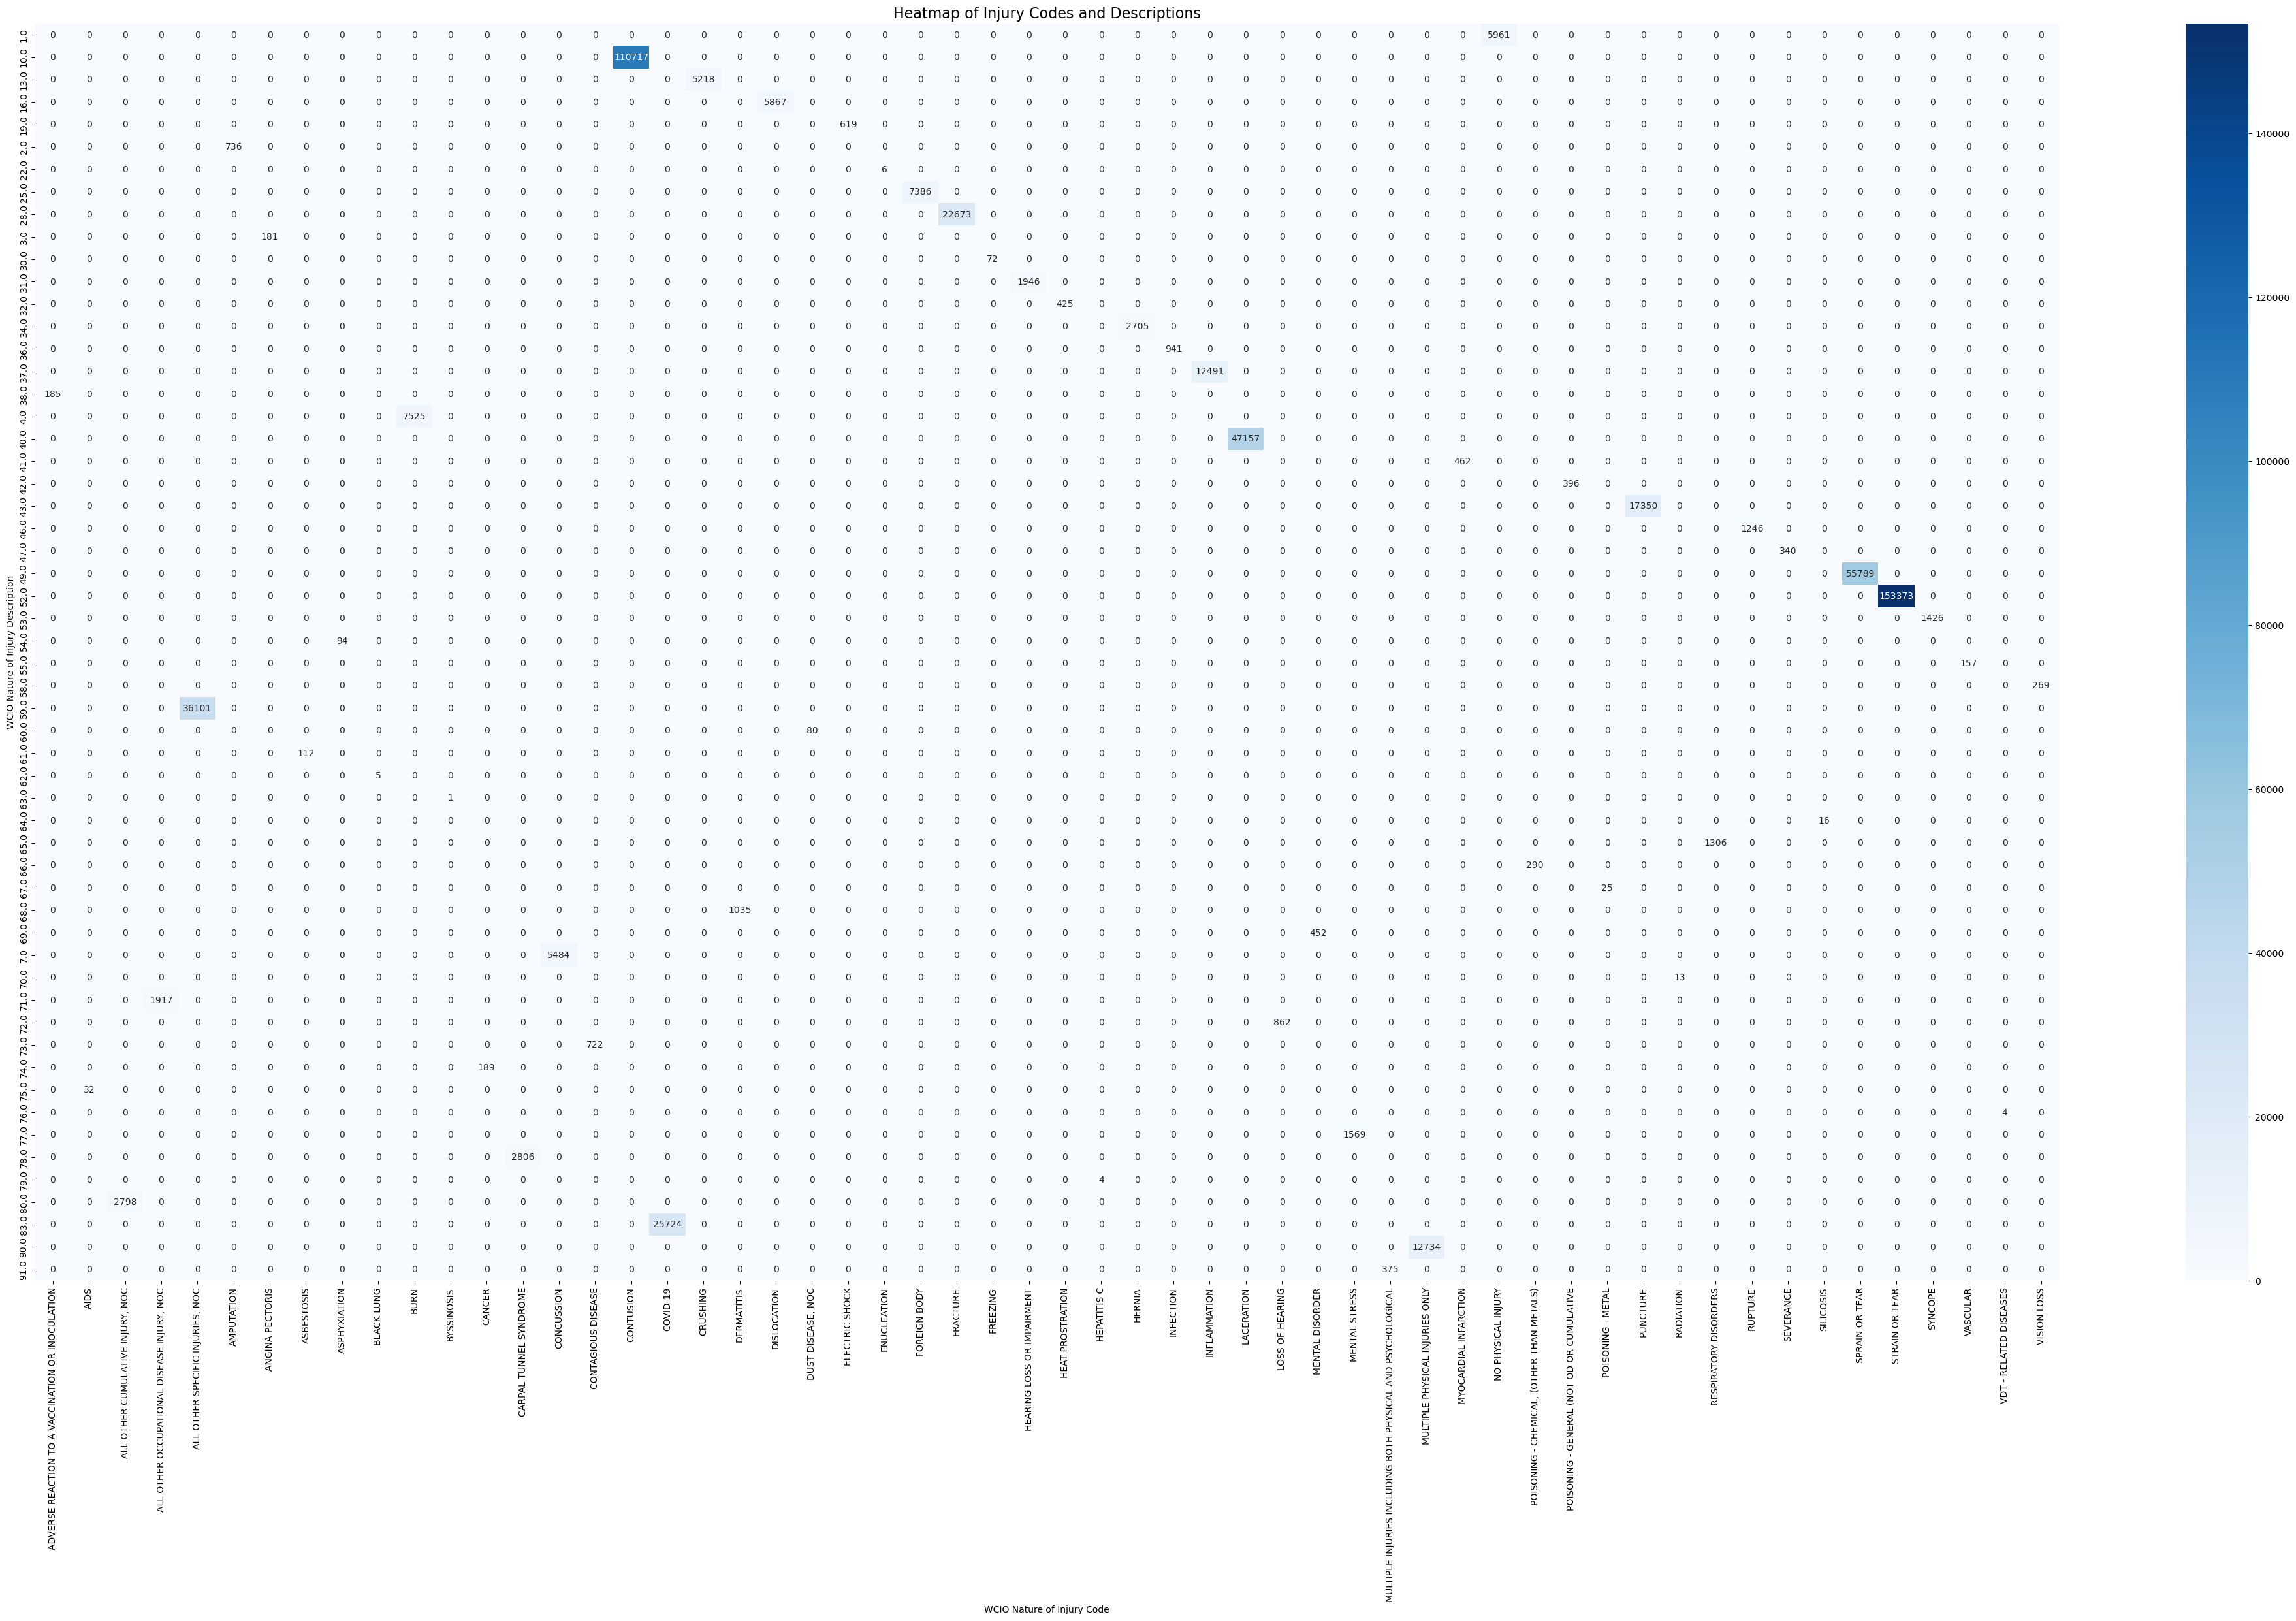

,nature_Injury_code,nature_Injury_desc


In [20]:
#create a dataframe of wcio nature injury codes and descriptions
injury_code_and_descriptions = df = pd.DataFrame({
    'nature_Injury_code': wcio_nature_injury_code,
    'nature_Injury_desc': wcio_nature_injury_code_desc
})

#create pivot table with injury codes as the index and the descriptions as the columns
pivot_table = injury_code_and_descriptions.pivot_table(index='nature_Injury_code', 
                                columns='nature_Injury_desc', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(50, 25))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Injury Codes and Descriptions', fontsize=16)
plt.xlabel('WCIO Nature of Injury Code')
plt.ylabel('WCIO Nature of Injury Description')
plt.show()

#check for rows where injury code is NA, but there is an injury description
#There are no rows that meet this condition, so there isn't any info to be gained by the injury description column
injury_code_and_descriptions[(injury_code_and_descriptions['nature_Injury_code'].isna()) & (injury_code_and_descriptions['nature_Injury_desc'].notna())]

In [48]:
#Create buckets for nature of injury

# Create the new 'Cause of Injury Bucket' column
train['Nature of Injury Bucket'] = None

#Create the buckets
train.loc[train['WCIO Nature of Injury Code'] <= 59, 'Nature of Injury Bucket'] = "1 - Specific"
train.loc[train['WCIO Nature of Injury Code'].between(60, 89), 'Nature of Injury Bucket'] = "2 - Occupational/Cumulative"
train.loc[train['WCIO Nature of Injury Code'] >= 90, 'Nature of Injury Bucket'] = "3 - Multiple"

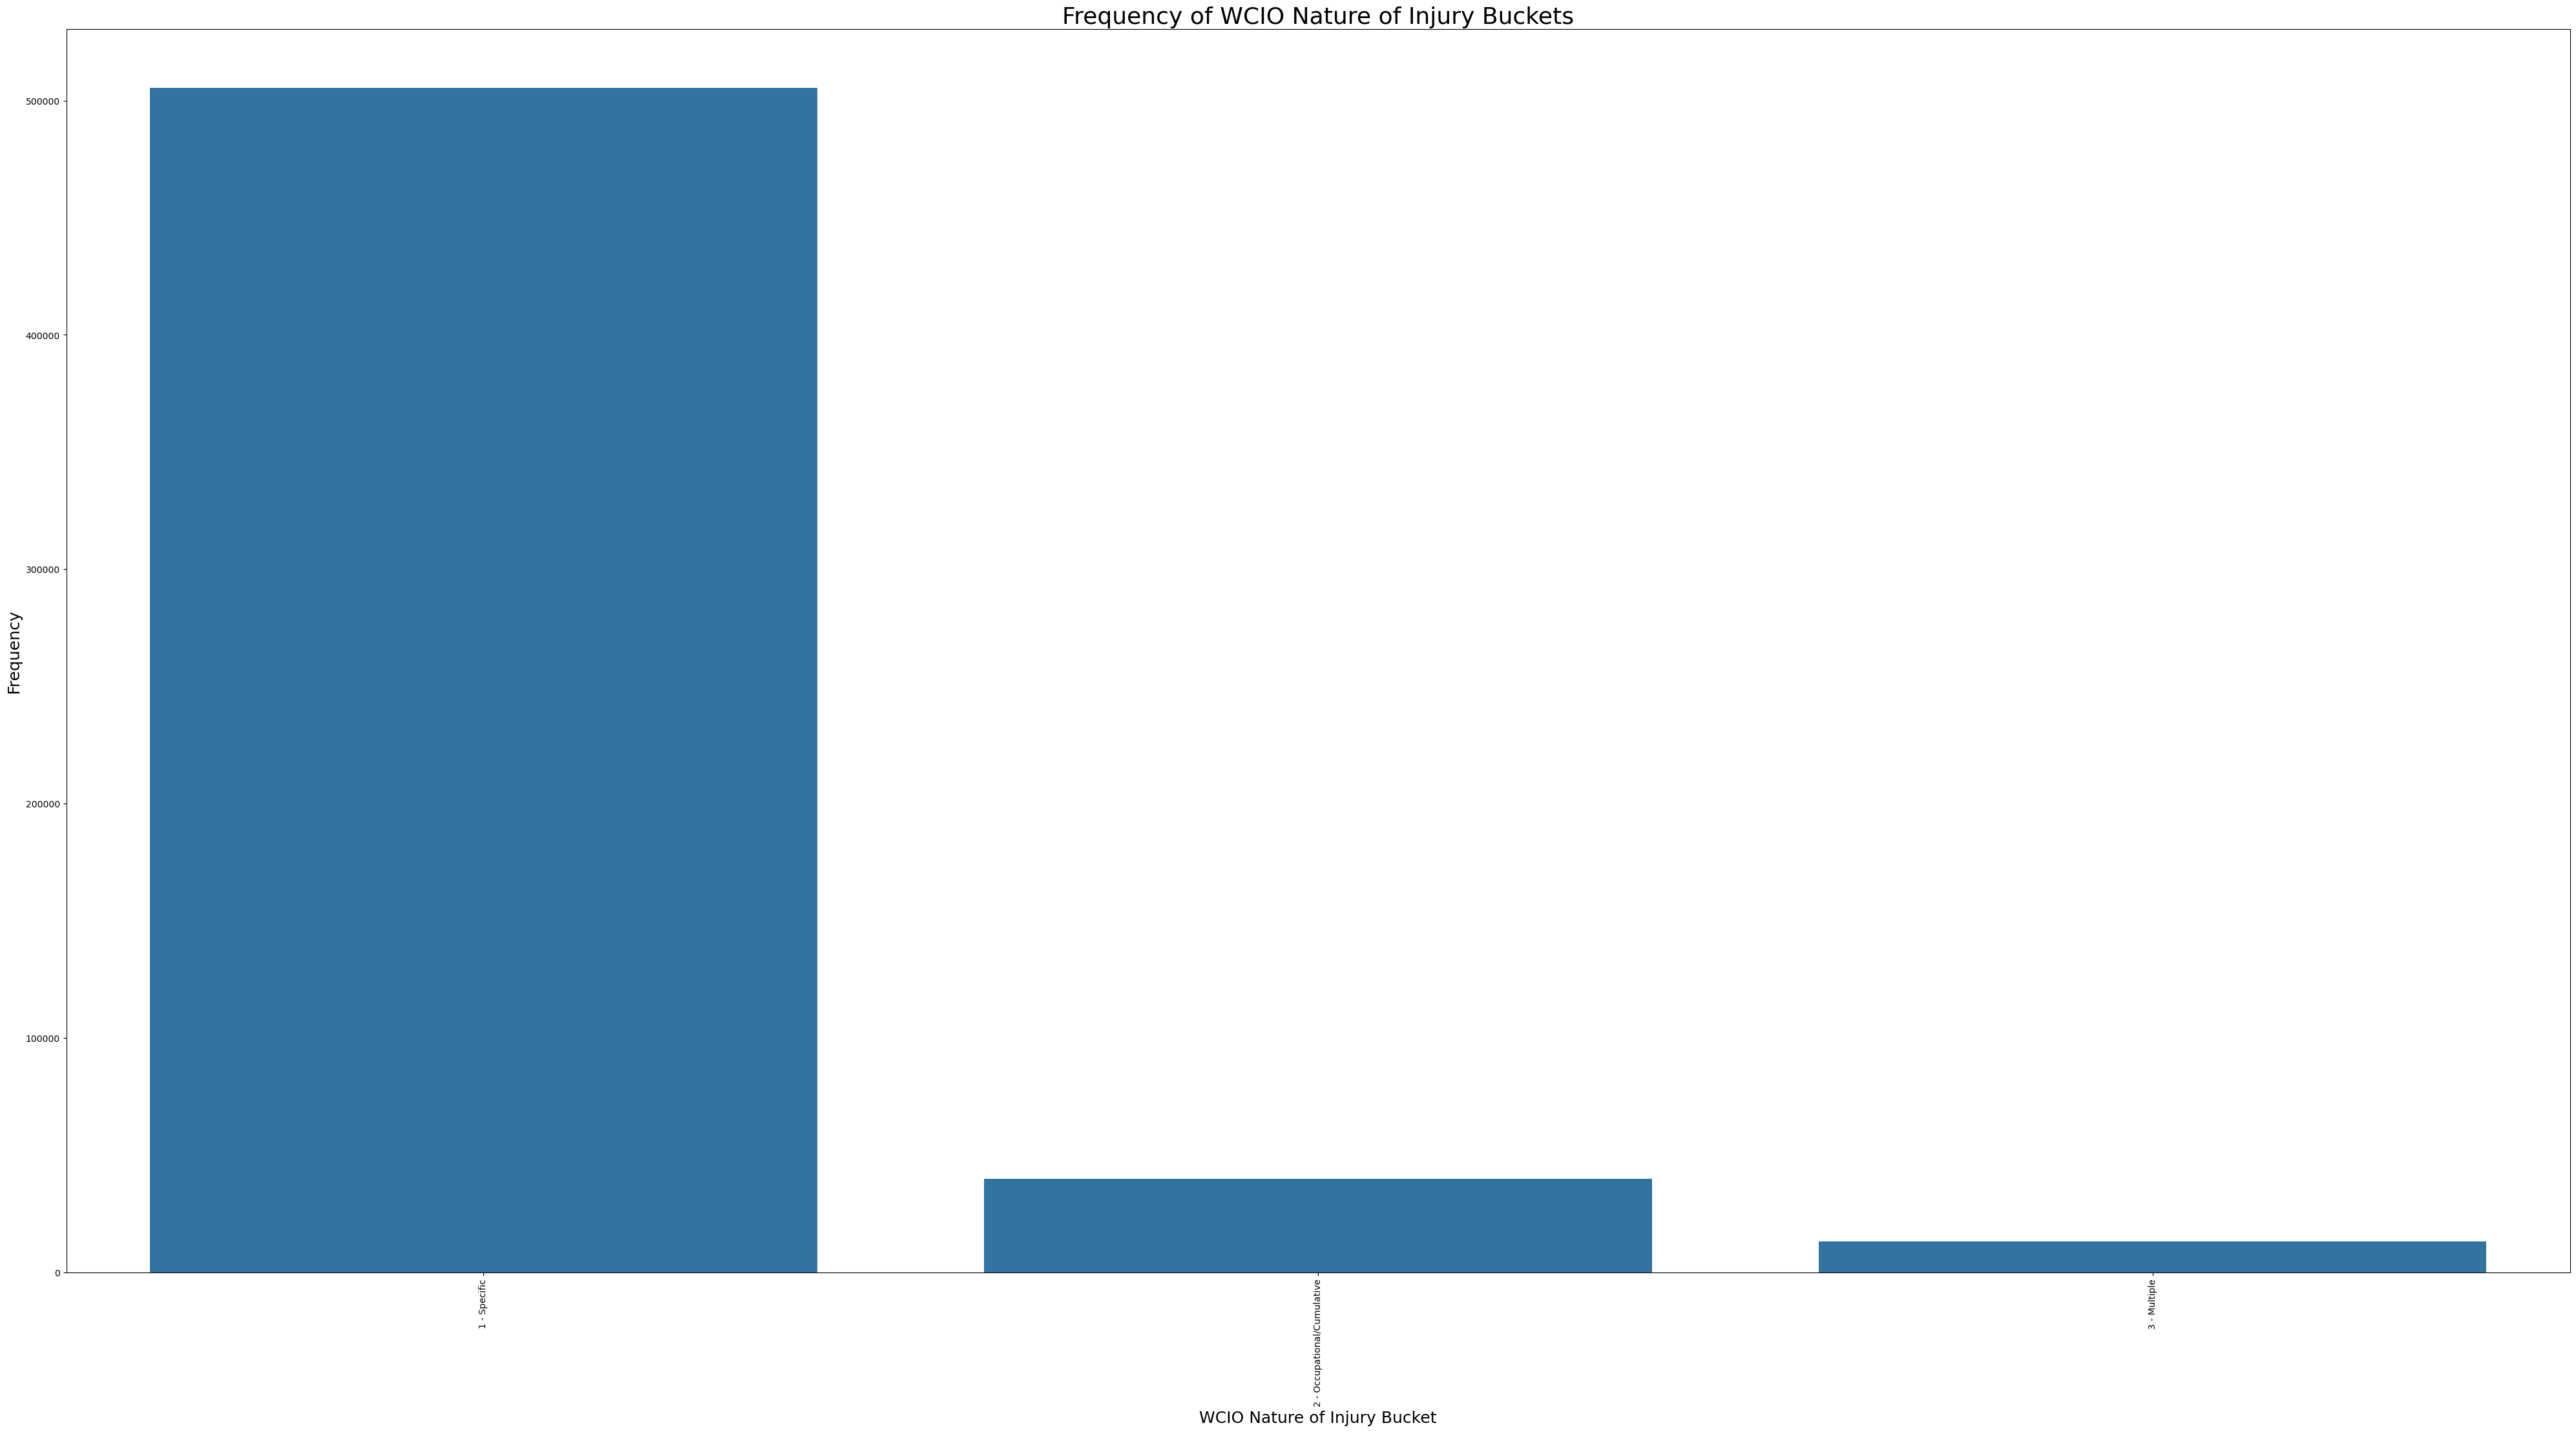

In [65]:
#Calculate frequency of each value
nature_injury_code_bucket_order = train['Nature of Injury Bucket'].value_counts().index

#plot bar graph of the nature of injury buckets
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_nature_injury_bucket, order=nature_injury_code_bucket_order)
plt.xlabel('WCIO Nature of Injury Bucket', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Nature of Injury Buckets', fontsize=26)
plt.xticks(rotation=90,)   
plt.show()

# WCIO Part of Body Code

**Description**:  
These codes are numbers that correspond to specific descriptions of injuries.

### **Recommendation**:  
- **Convert the codes to string type for consistency.**  
- **Leave NAs as is.**

### Strange Values:  
- None identified.

### Number of NAs:  
- 36,527 missing values.

### Feature Engineering:  
- Create a new `Cause of Injury Bucket` column.

  **Reference**:  
  - [WCIO Nature of Injury Codes](https://www.dir.ca.gov/dwc/WCIS/Nature_Of_Injury.pdf)


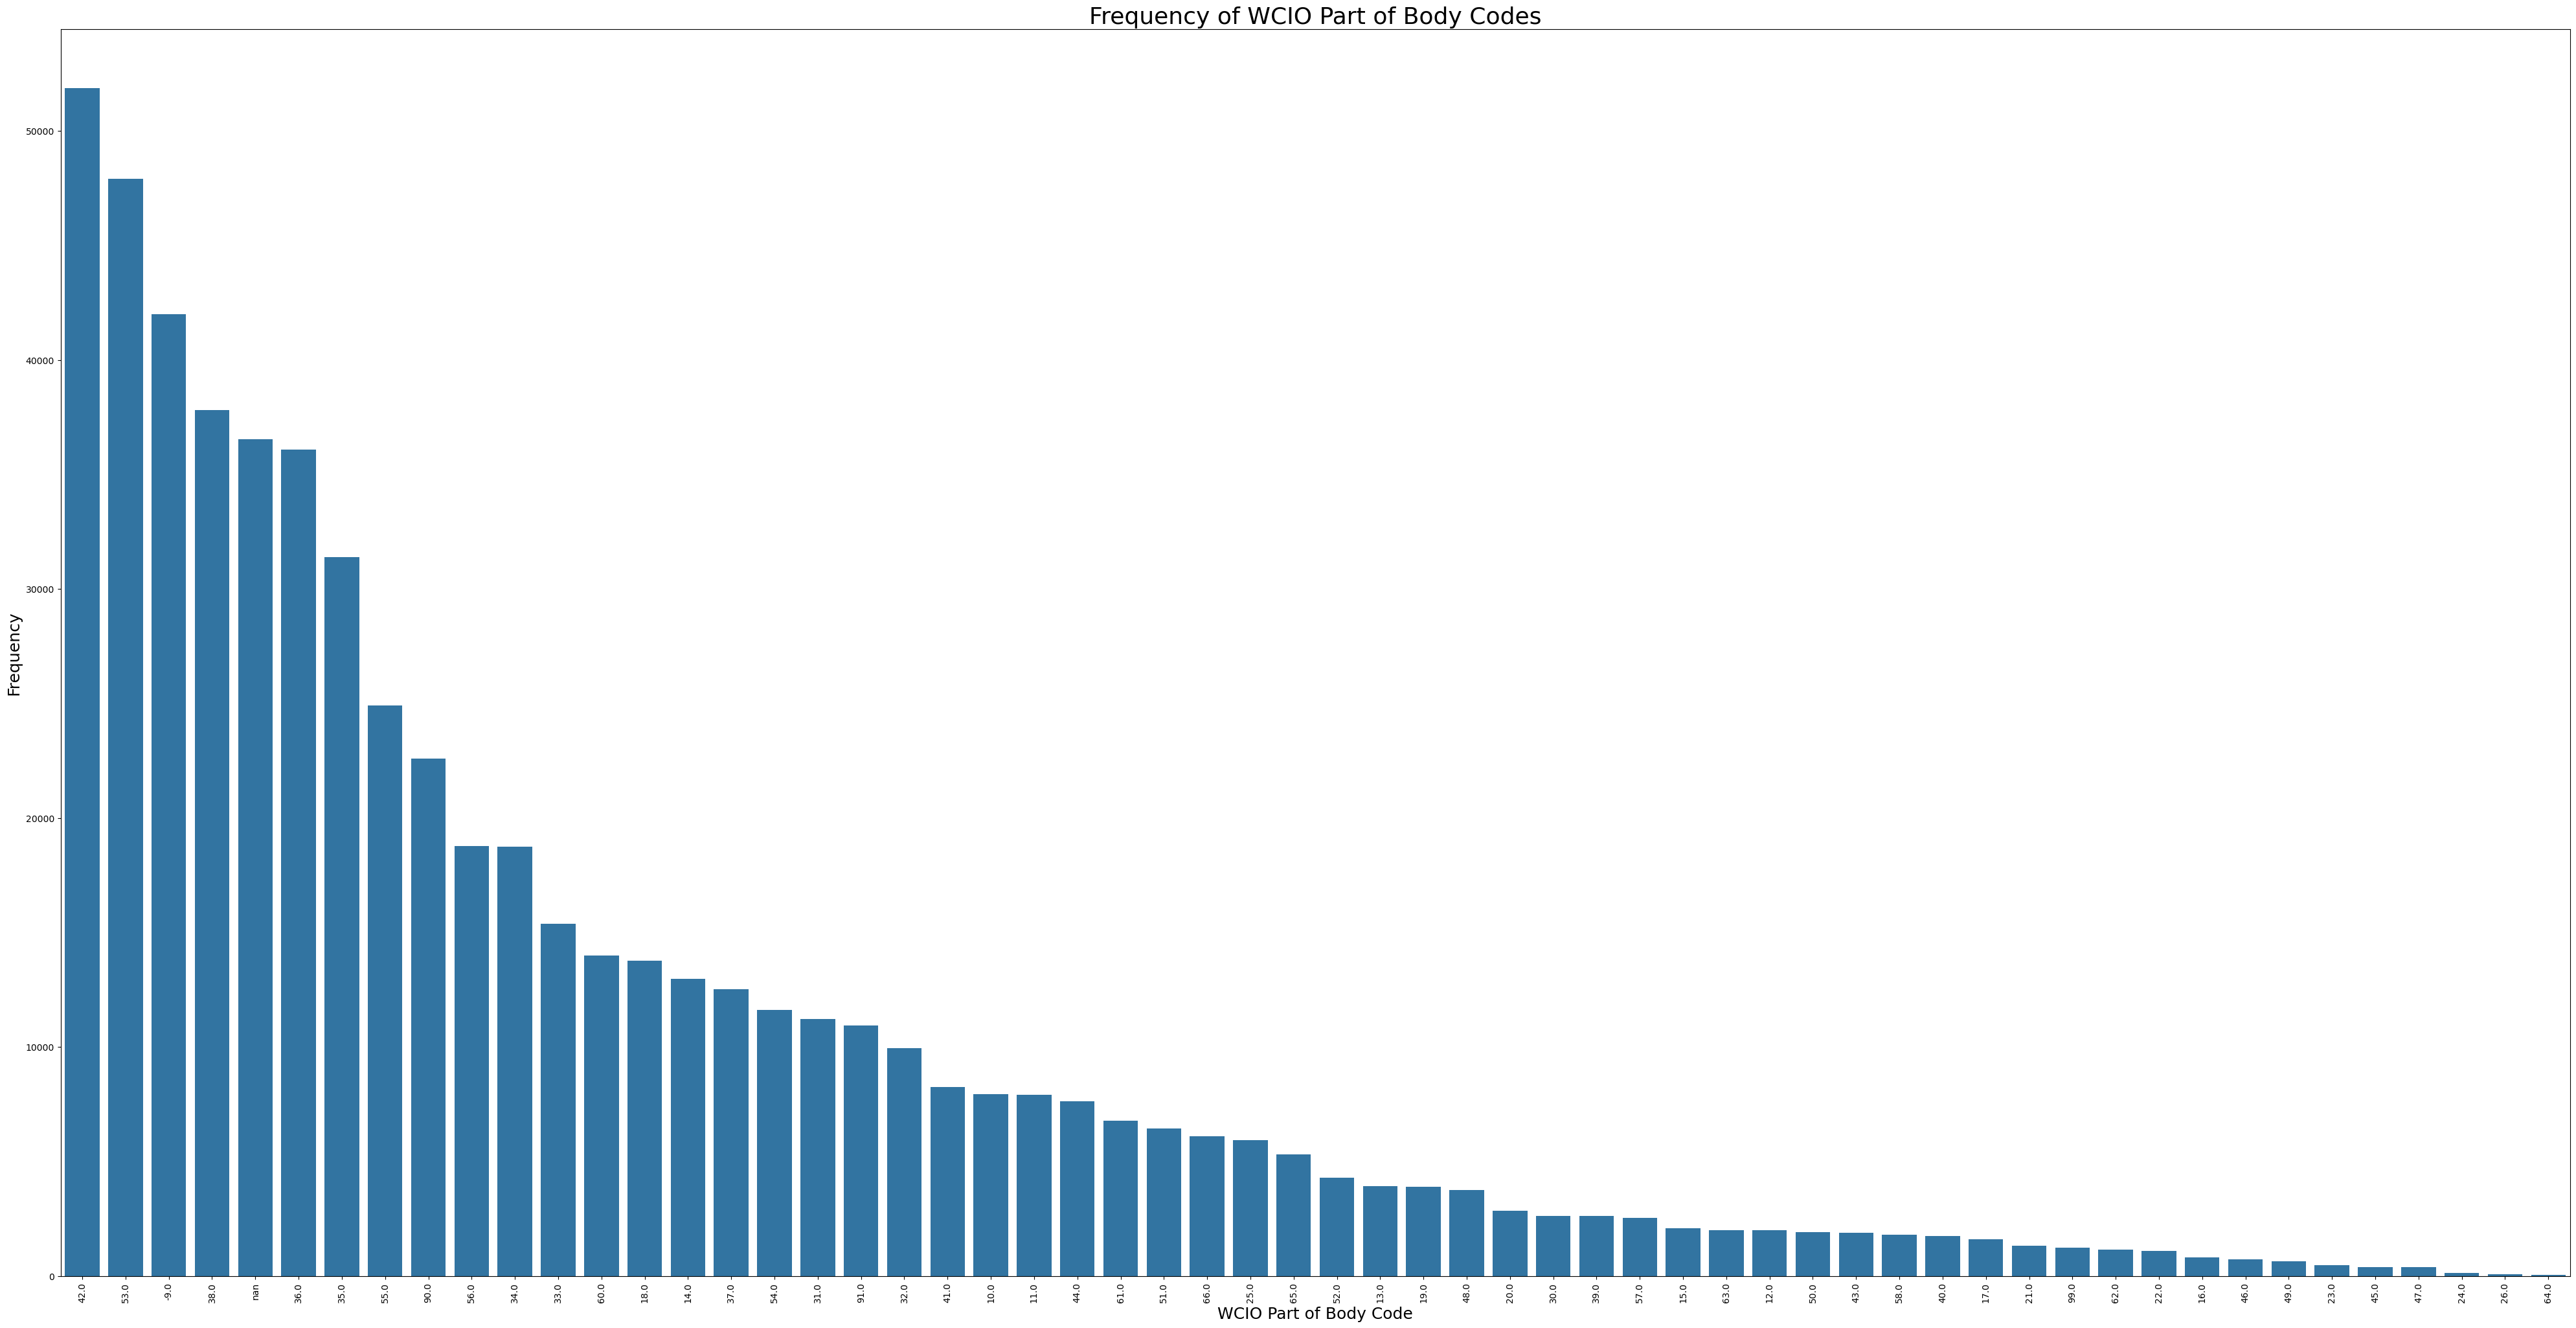

36527

In [66]:
#convert to body codes to string
wcio_body_code = train['WCIO Part Of Body Code'].astype(str) 

#Calculate frequency of each value
body_code_order = wcio_body_code.value_counts().index

#plot body codes as bar graph
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_body_code, order=body_code_order)
plt.xlabel('WCIO Part of Body Code', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Part of Body Codes', fontsize=26)
plt.xticks(rotation=90,)  # Rotate x labels 
plt.show()

#replace empty strings with nulls and count the sum
wcio_body_code.replace("nan", np.nan, inplace=True)
wcio_body_code.isna().sum()

# WCIO Part of Body Description

**Description**:  
These are descriptions that correspond to the Part of Body Codes.

### **Recommendation**:  
- **Drop this column due to redundancy with body codes.**

### Missing Values:  
- 36,527 missing values.

### Feature Engineering:  
- None needed.


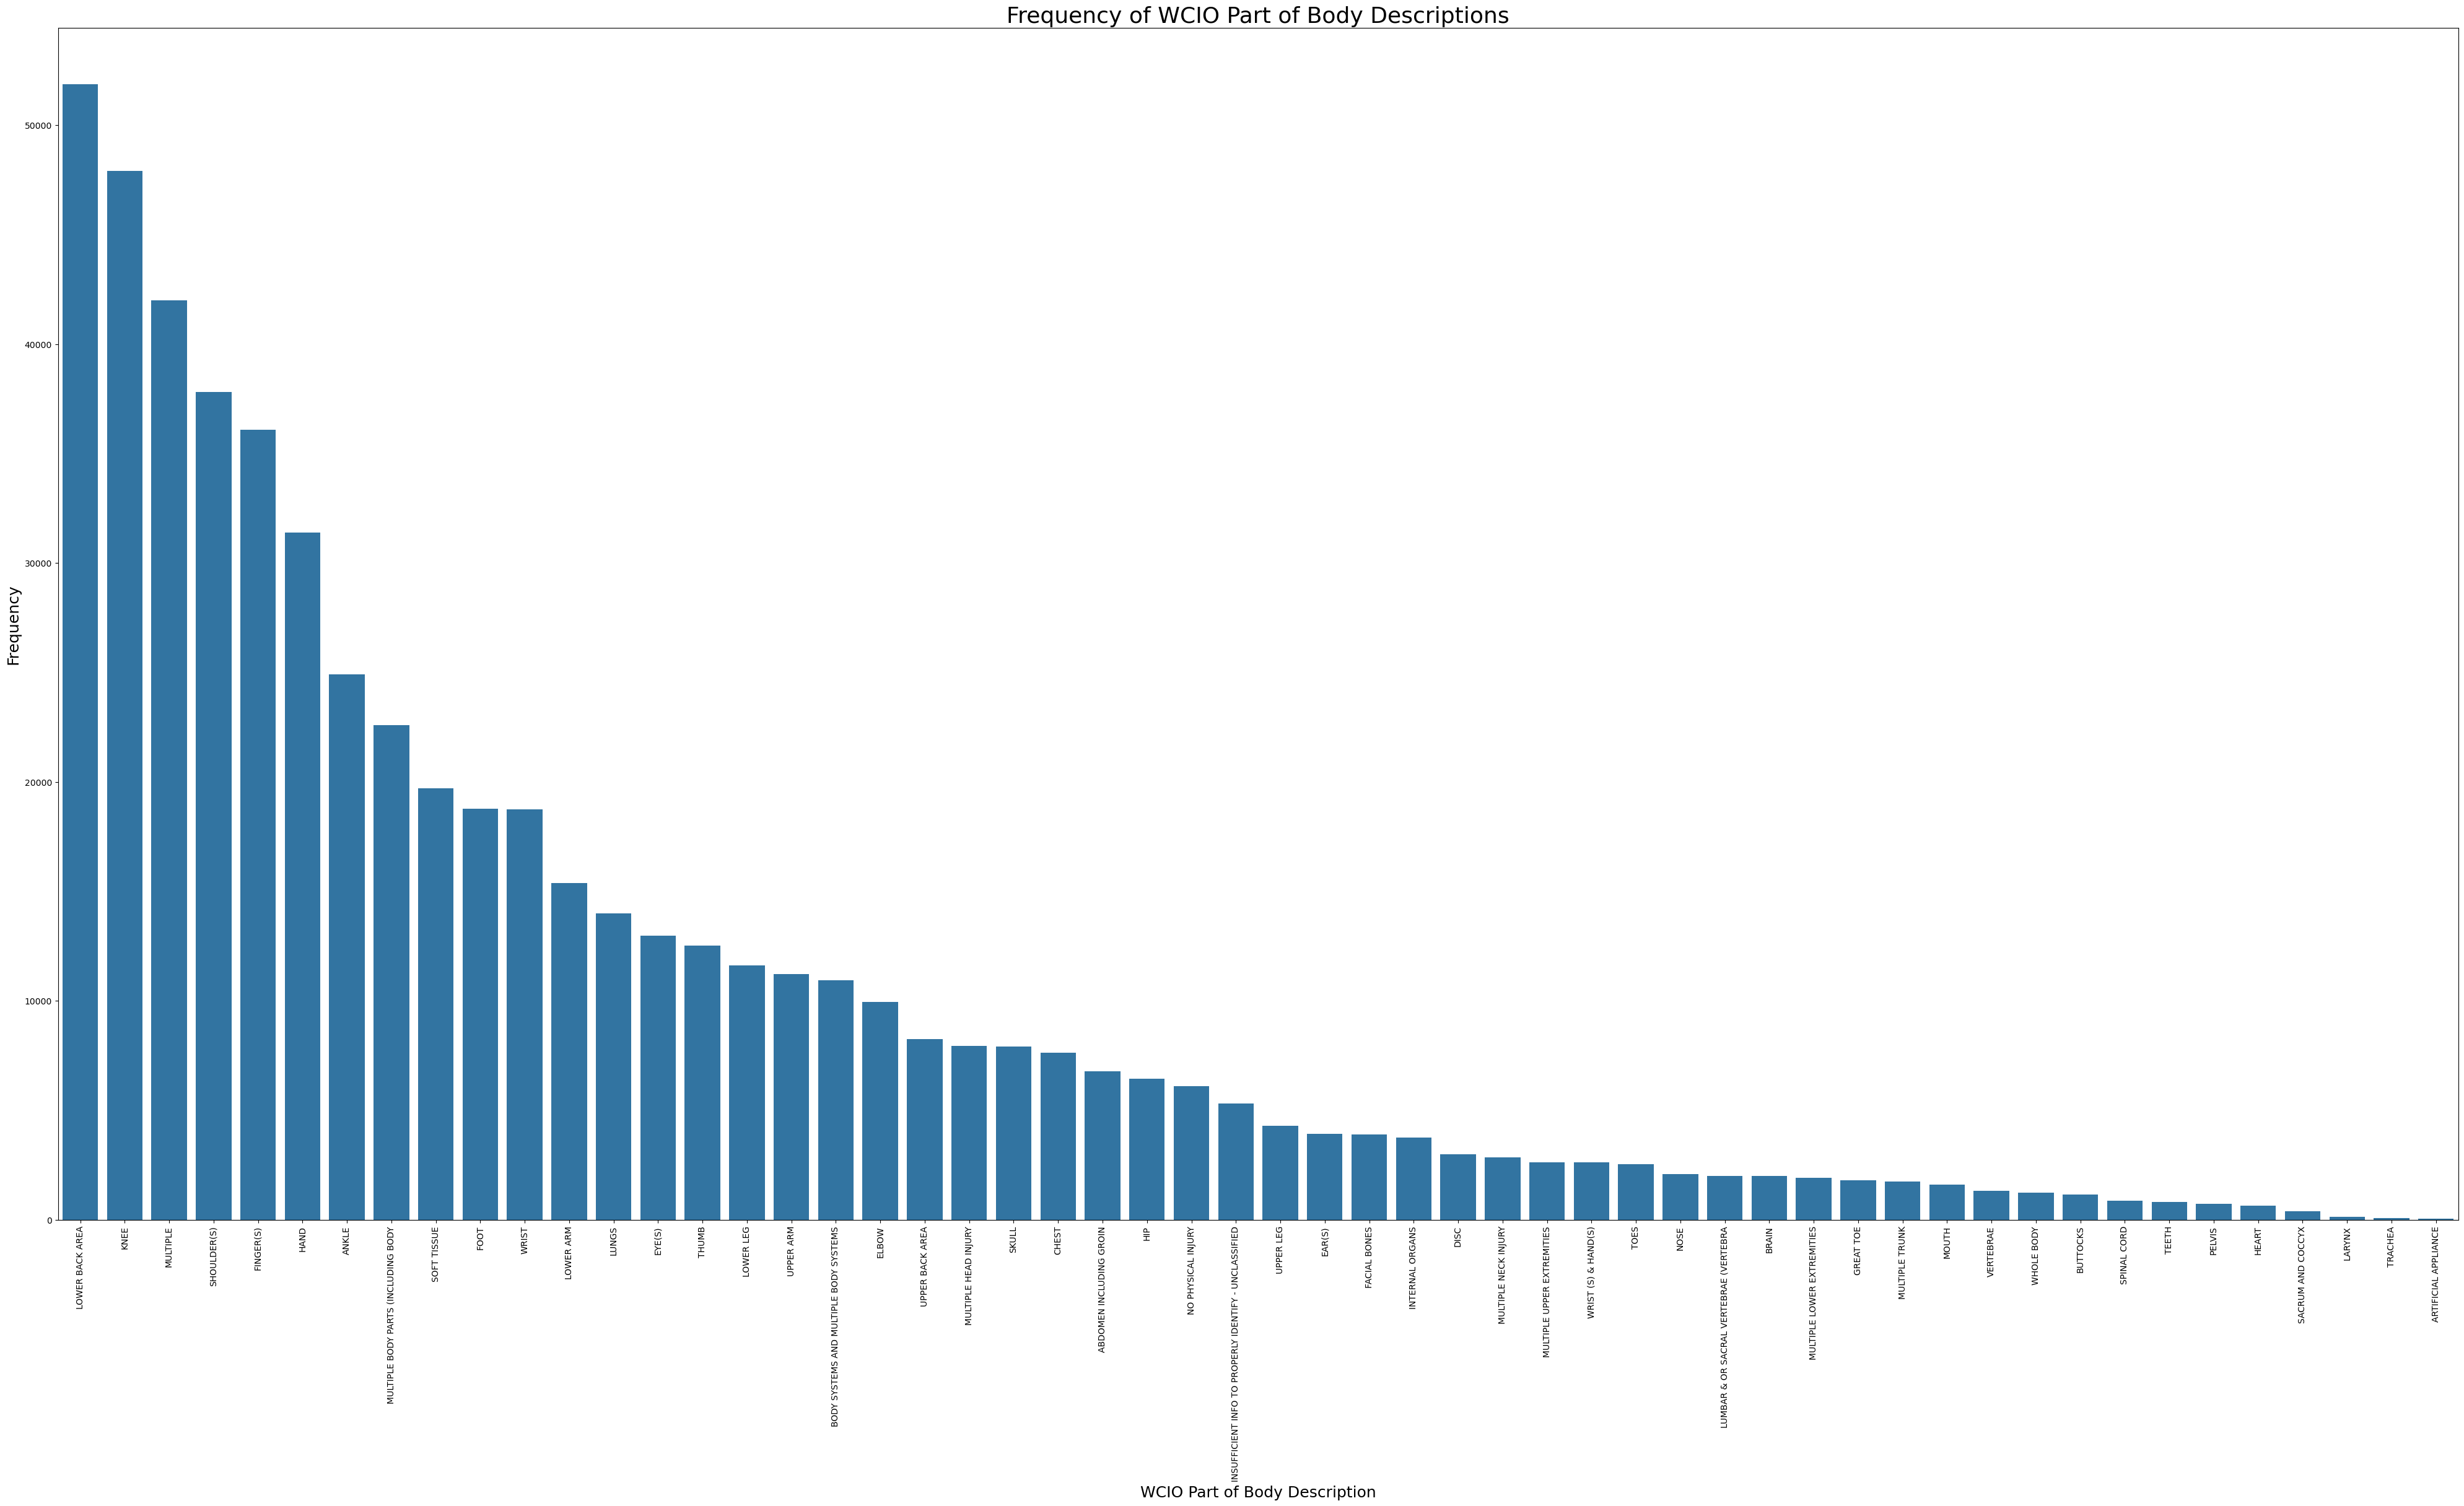

In [68]:
#grab part of body descriptions
wcio_body_code_desc = train['WCIO Part Of Body Description']

#Calculate frequency of each value
body_code_desc_order = wcio_body_code_desc.value_counts().index

#plot bar graph of body part descriptions
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_body_code_desc, order=body_code_desc_order)
plt.xlabel('WCIO Part of Body Description', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Part of Body Descriptions', fontsize=26)
plt.xticks(rotation=90,)  
plt.show()

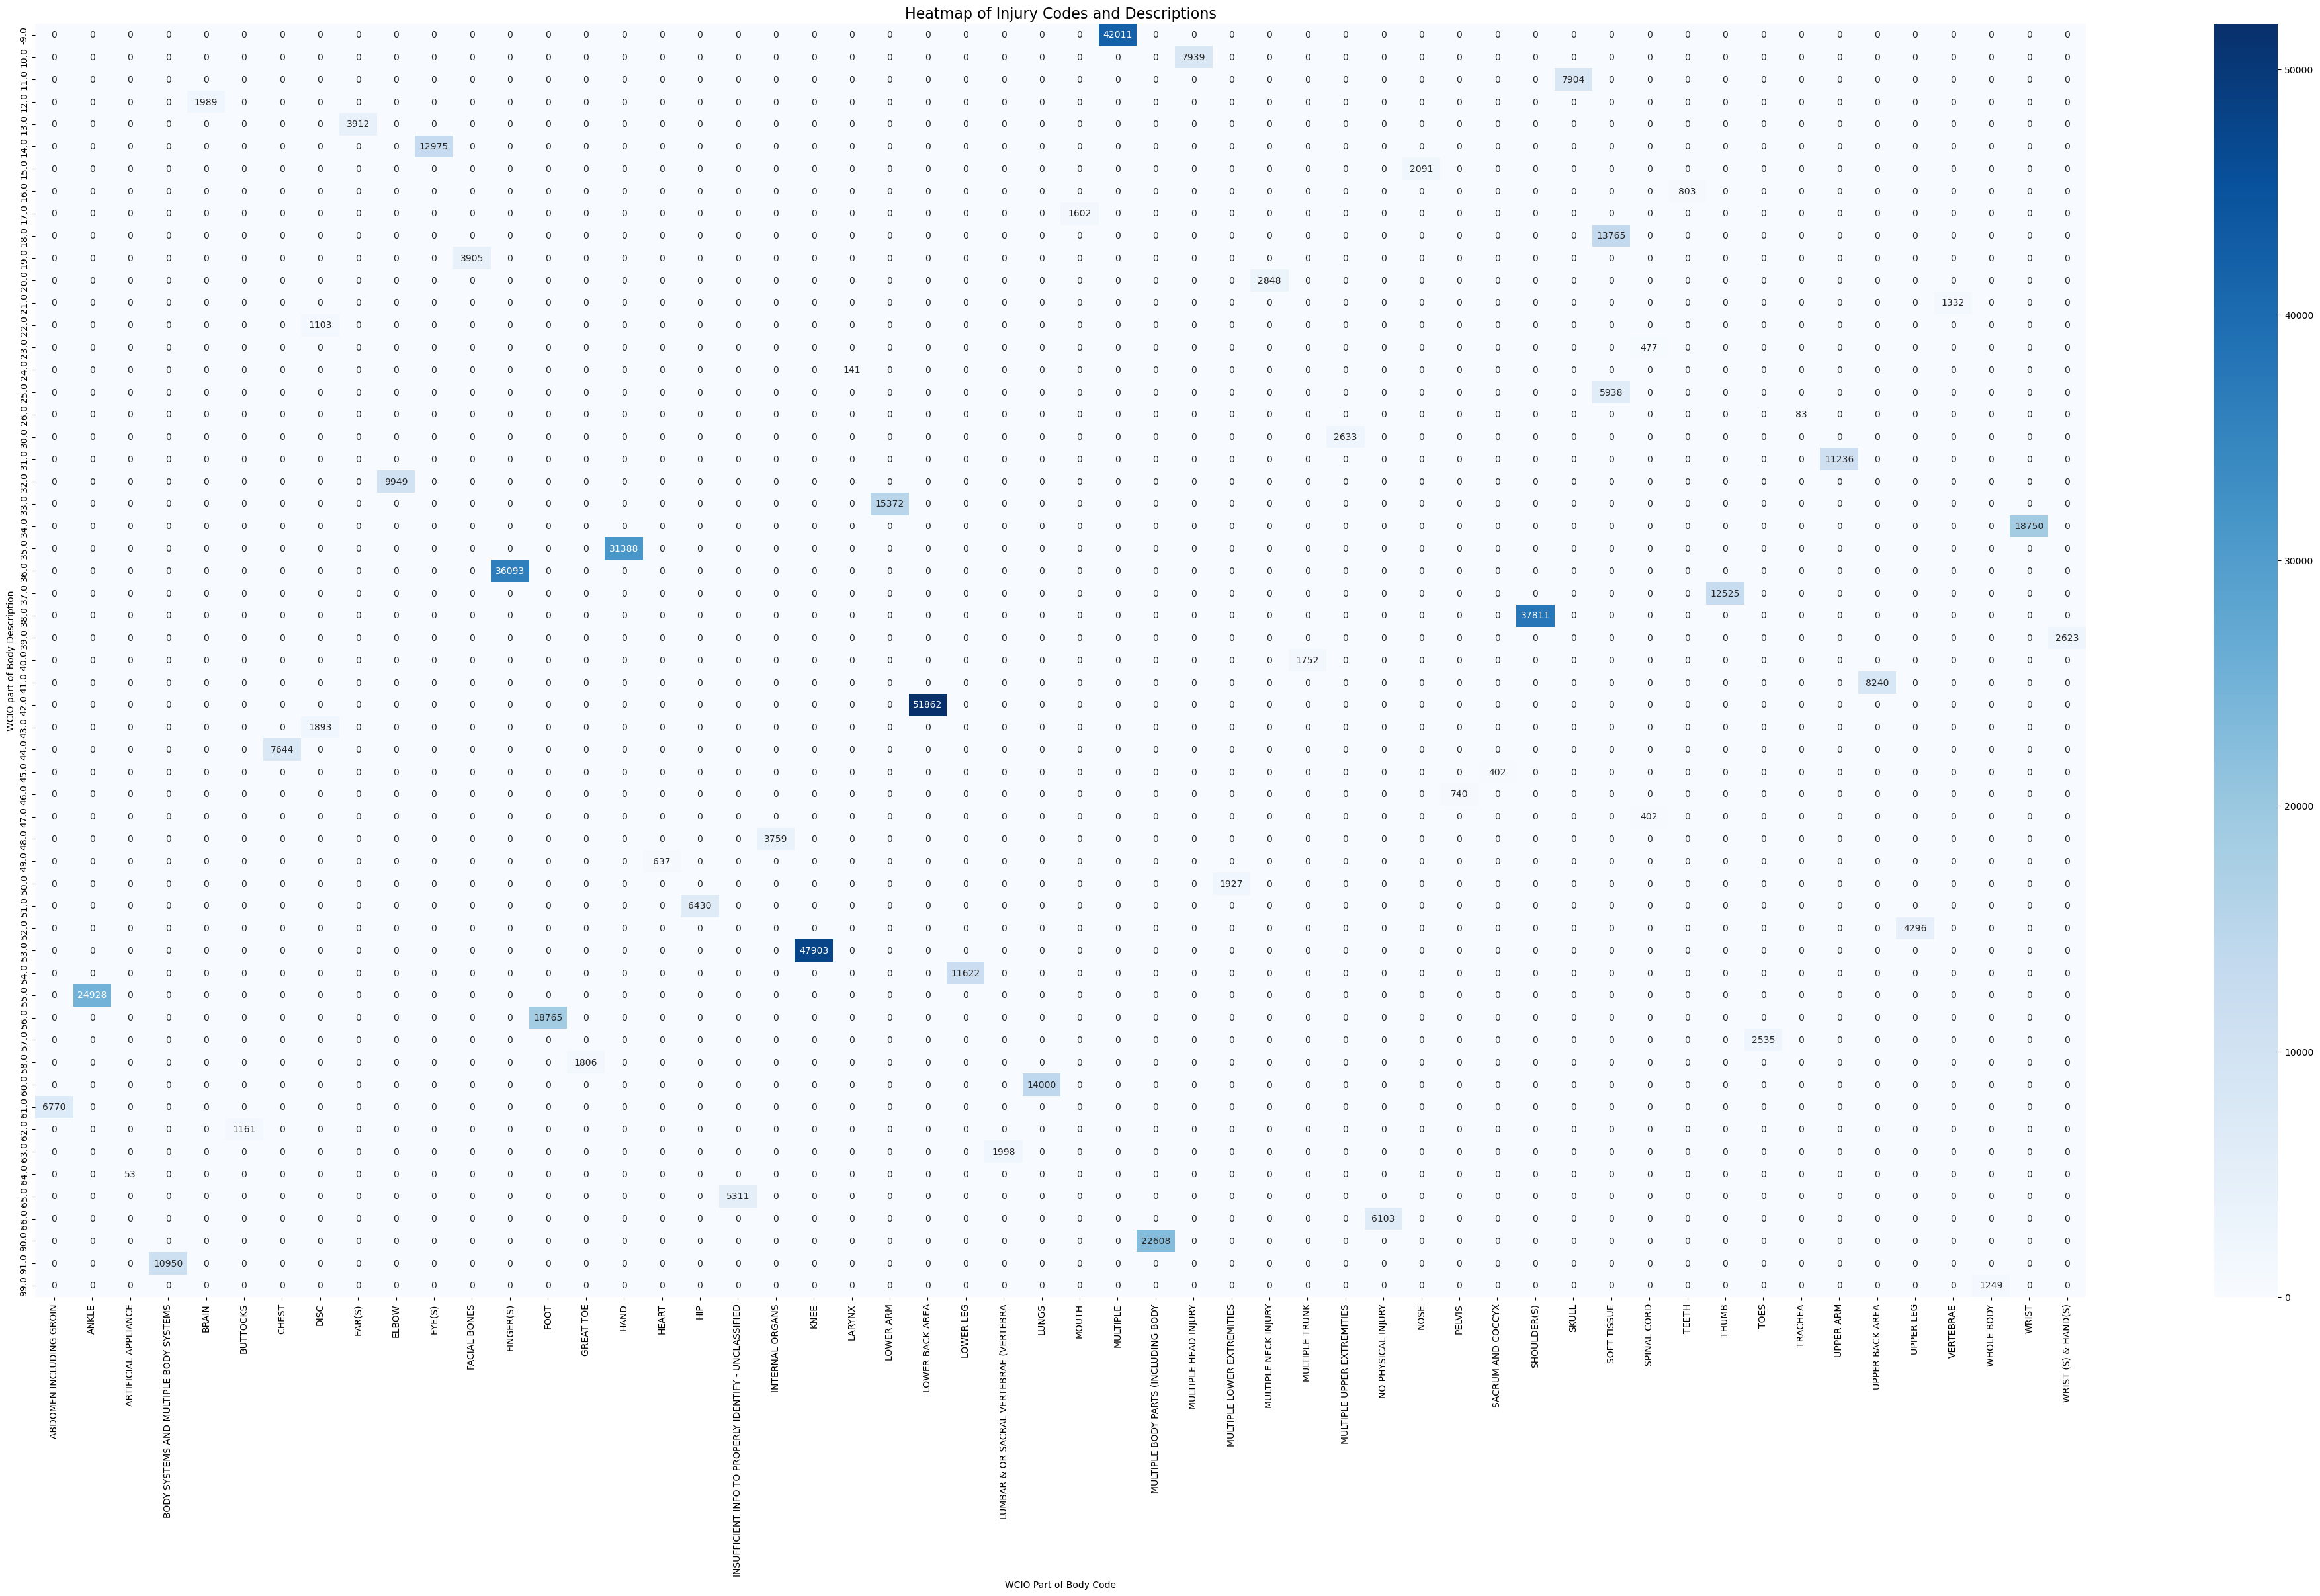

,body_code,body_code_desc


In [35]:
#create a dataframe of wcio part of body codes and descriptions
body_code_and_descriptions = df = pd.DataFrame({
    'body_code': wcio_body_code,
    'body_code_desc': wcio_body_code_desc
})

#create a pivot table with body_code as the index and body_code_desc as the columns
pivot_table = body_code_and_descriptions.pivot_table(index='body_code', 
                                columns='body_code_desc', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(50, 25))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Injury Codes and Descriptions', fontsize=16)
plt.xlabel('WCIO Part of Body Code')
plt.ylabel('WCIO part of Body Description')
plt.show()

#check for rows where injury code is NA, but there is an injury description
#There are no rows that meet this condition, so there isn't any info to be gained by the injury description column
body_code_and_descriptions[(body_code_and_descriptions['body_code'].isna()) & (body_code_and_descriptions['body_code_desc'].notna())]

In [50]:
#create buckets for Part of Body

# Initialize the new 'Part of Body Bucket' column with None
train['Part of Body Bucket'] = None

# I. Head (Codes 10-19)
train.loc[train['WCIO Part Of Body Code'].between(10.0, 19.0), 'Part of Body Bucket'] = "I - Head"

# II. Neck (Codes 20-26)
train.loc[train['WCIO Part Of Body Code'].between(20.0, 26.0), 'Part of Body Bucket'] = "II - Neck"

# III. Upper Extremities (Codes 30-38)
train.loc[train['WCIO Part Of Body Code'].between(30.0, 38.0), 'Part of Body Bucket'] = "III - Upper Extremities"

# IV. Trunk (Codes 40-49)
train.loc[train['WCIO Part Of Body Code'].between(40.0, 49.0), 'Part of Body Bucket'] = "IV - Trunk"

# V. Lower Extremities (Codes 50-58)
train.loc[train['WCIO Part Of Body Code'].between(50.0, 58.0), 'Part of Body Bucket'] = "V - Lower Extremities"

# VI. Multiple Body Parts (Codes 64, 65, 66, 90, 91, 99)
train.loc[train['WCIO Part Of Body Code'].isin([64.0, 65.0, 66.0, 90.0, 91.0, 99.0]), 'Part of Body Bucket'] = "VI - Multiple Body Parts"



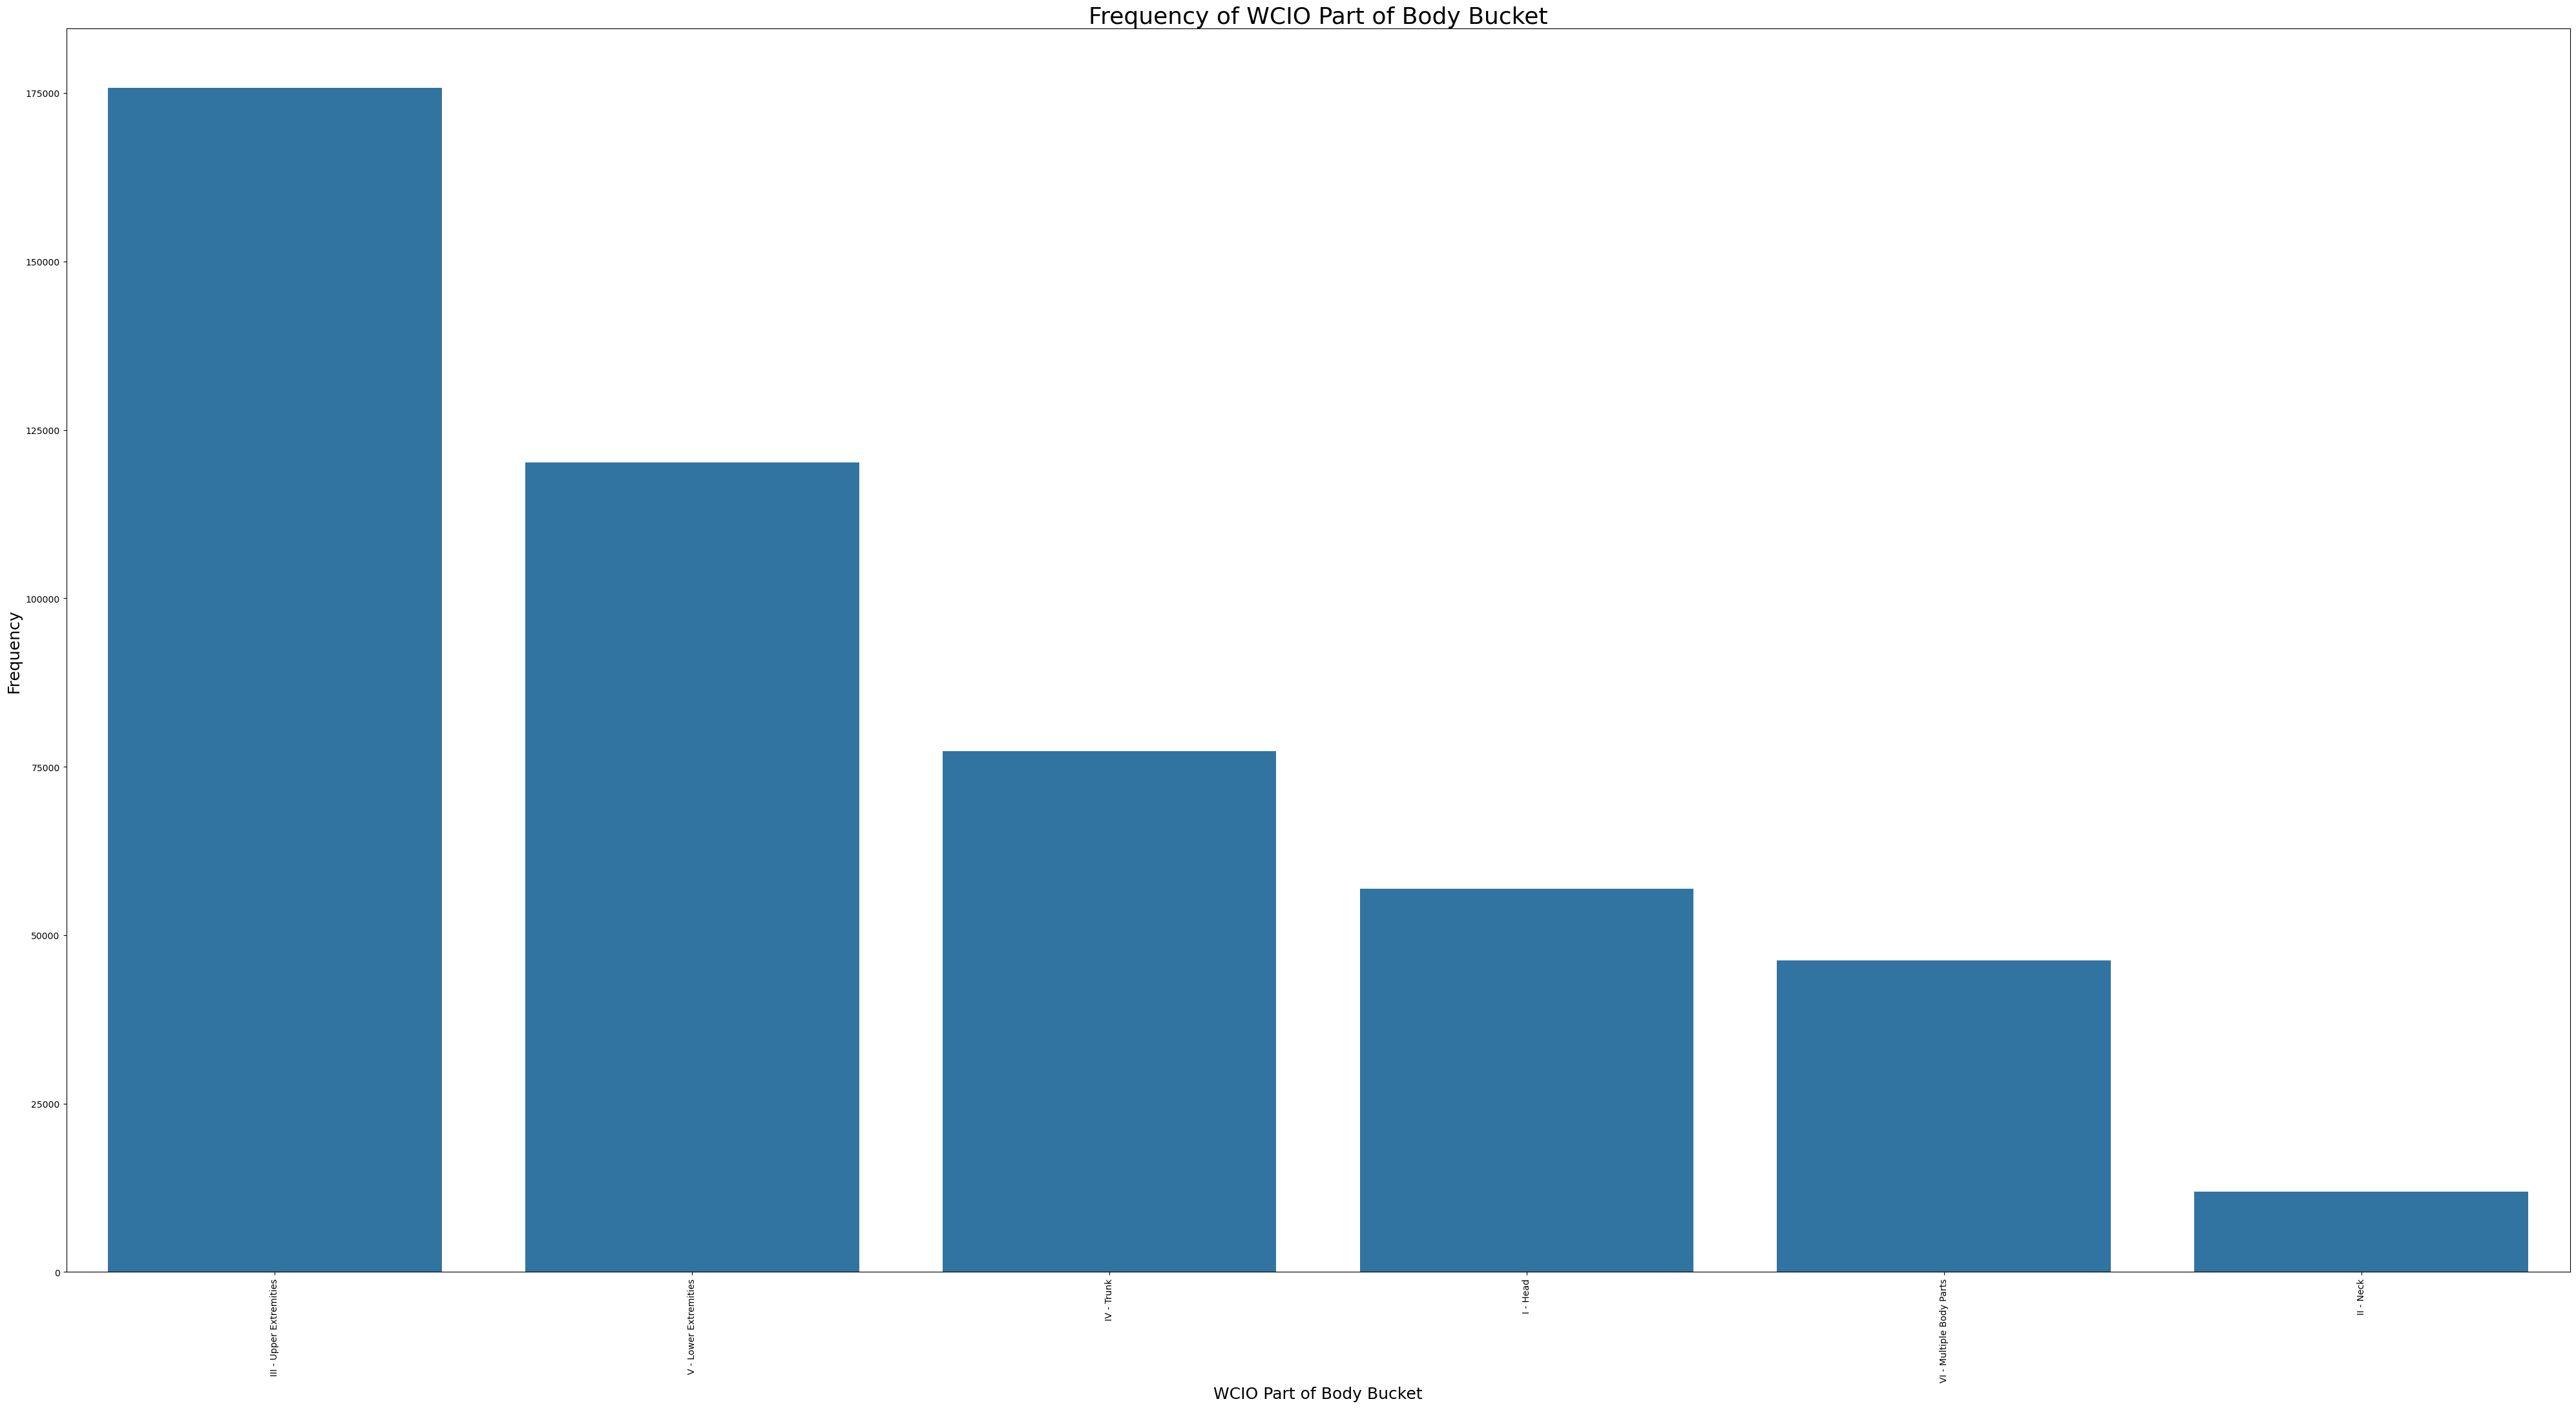

In [69]:
#Calculate frequency of each value
body_code_order_bucket = train['Part of Body Bucket'].value_counts().index

#Plot part of body buckets
plt.figure(figsize=(50, 25))
sns.countplot(x=wcio_body_bucket, order=body_code_order_bucket)
plt.xlabel('WCIO Part of Body Bucket', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of WCIO Part of Body Bucket', fontsize=26)
plt.xticks(rotation=90,)  # Rotate x labels 
plt.show()

# Correlation

In [89]:
train['WCIO Cause of Injury Code'] = train['WCIO Cause of Injury Code'].astype(str)
train['WCIO Nature of Injury Code'] = train['WCIO Nature of Injury Code'].astype(str)
train['WCIO Part Of Body Code'] = train['WCIO Part Of Body Code'].astype(str)

In [78]:
#Get metric and non_metric features
#metric_features = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'Number of Dependents']
#non_metric_features = train.columns.drop(metric_features).to_list()

C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\1715334403.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (k - 1)))
C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\1715334403.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (k - 1)))
C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\1715334403.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (k - 1)))
C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\1715334403.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (k - 1)))
C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\1715334403.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (k - 1)))
C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\1715334403.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (k - 1)))
C:\Users\sacar\AppData\Local\Temp\ipykernel_29308\17

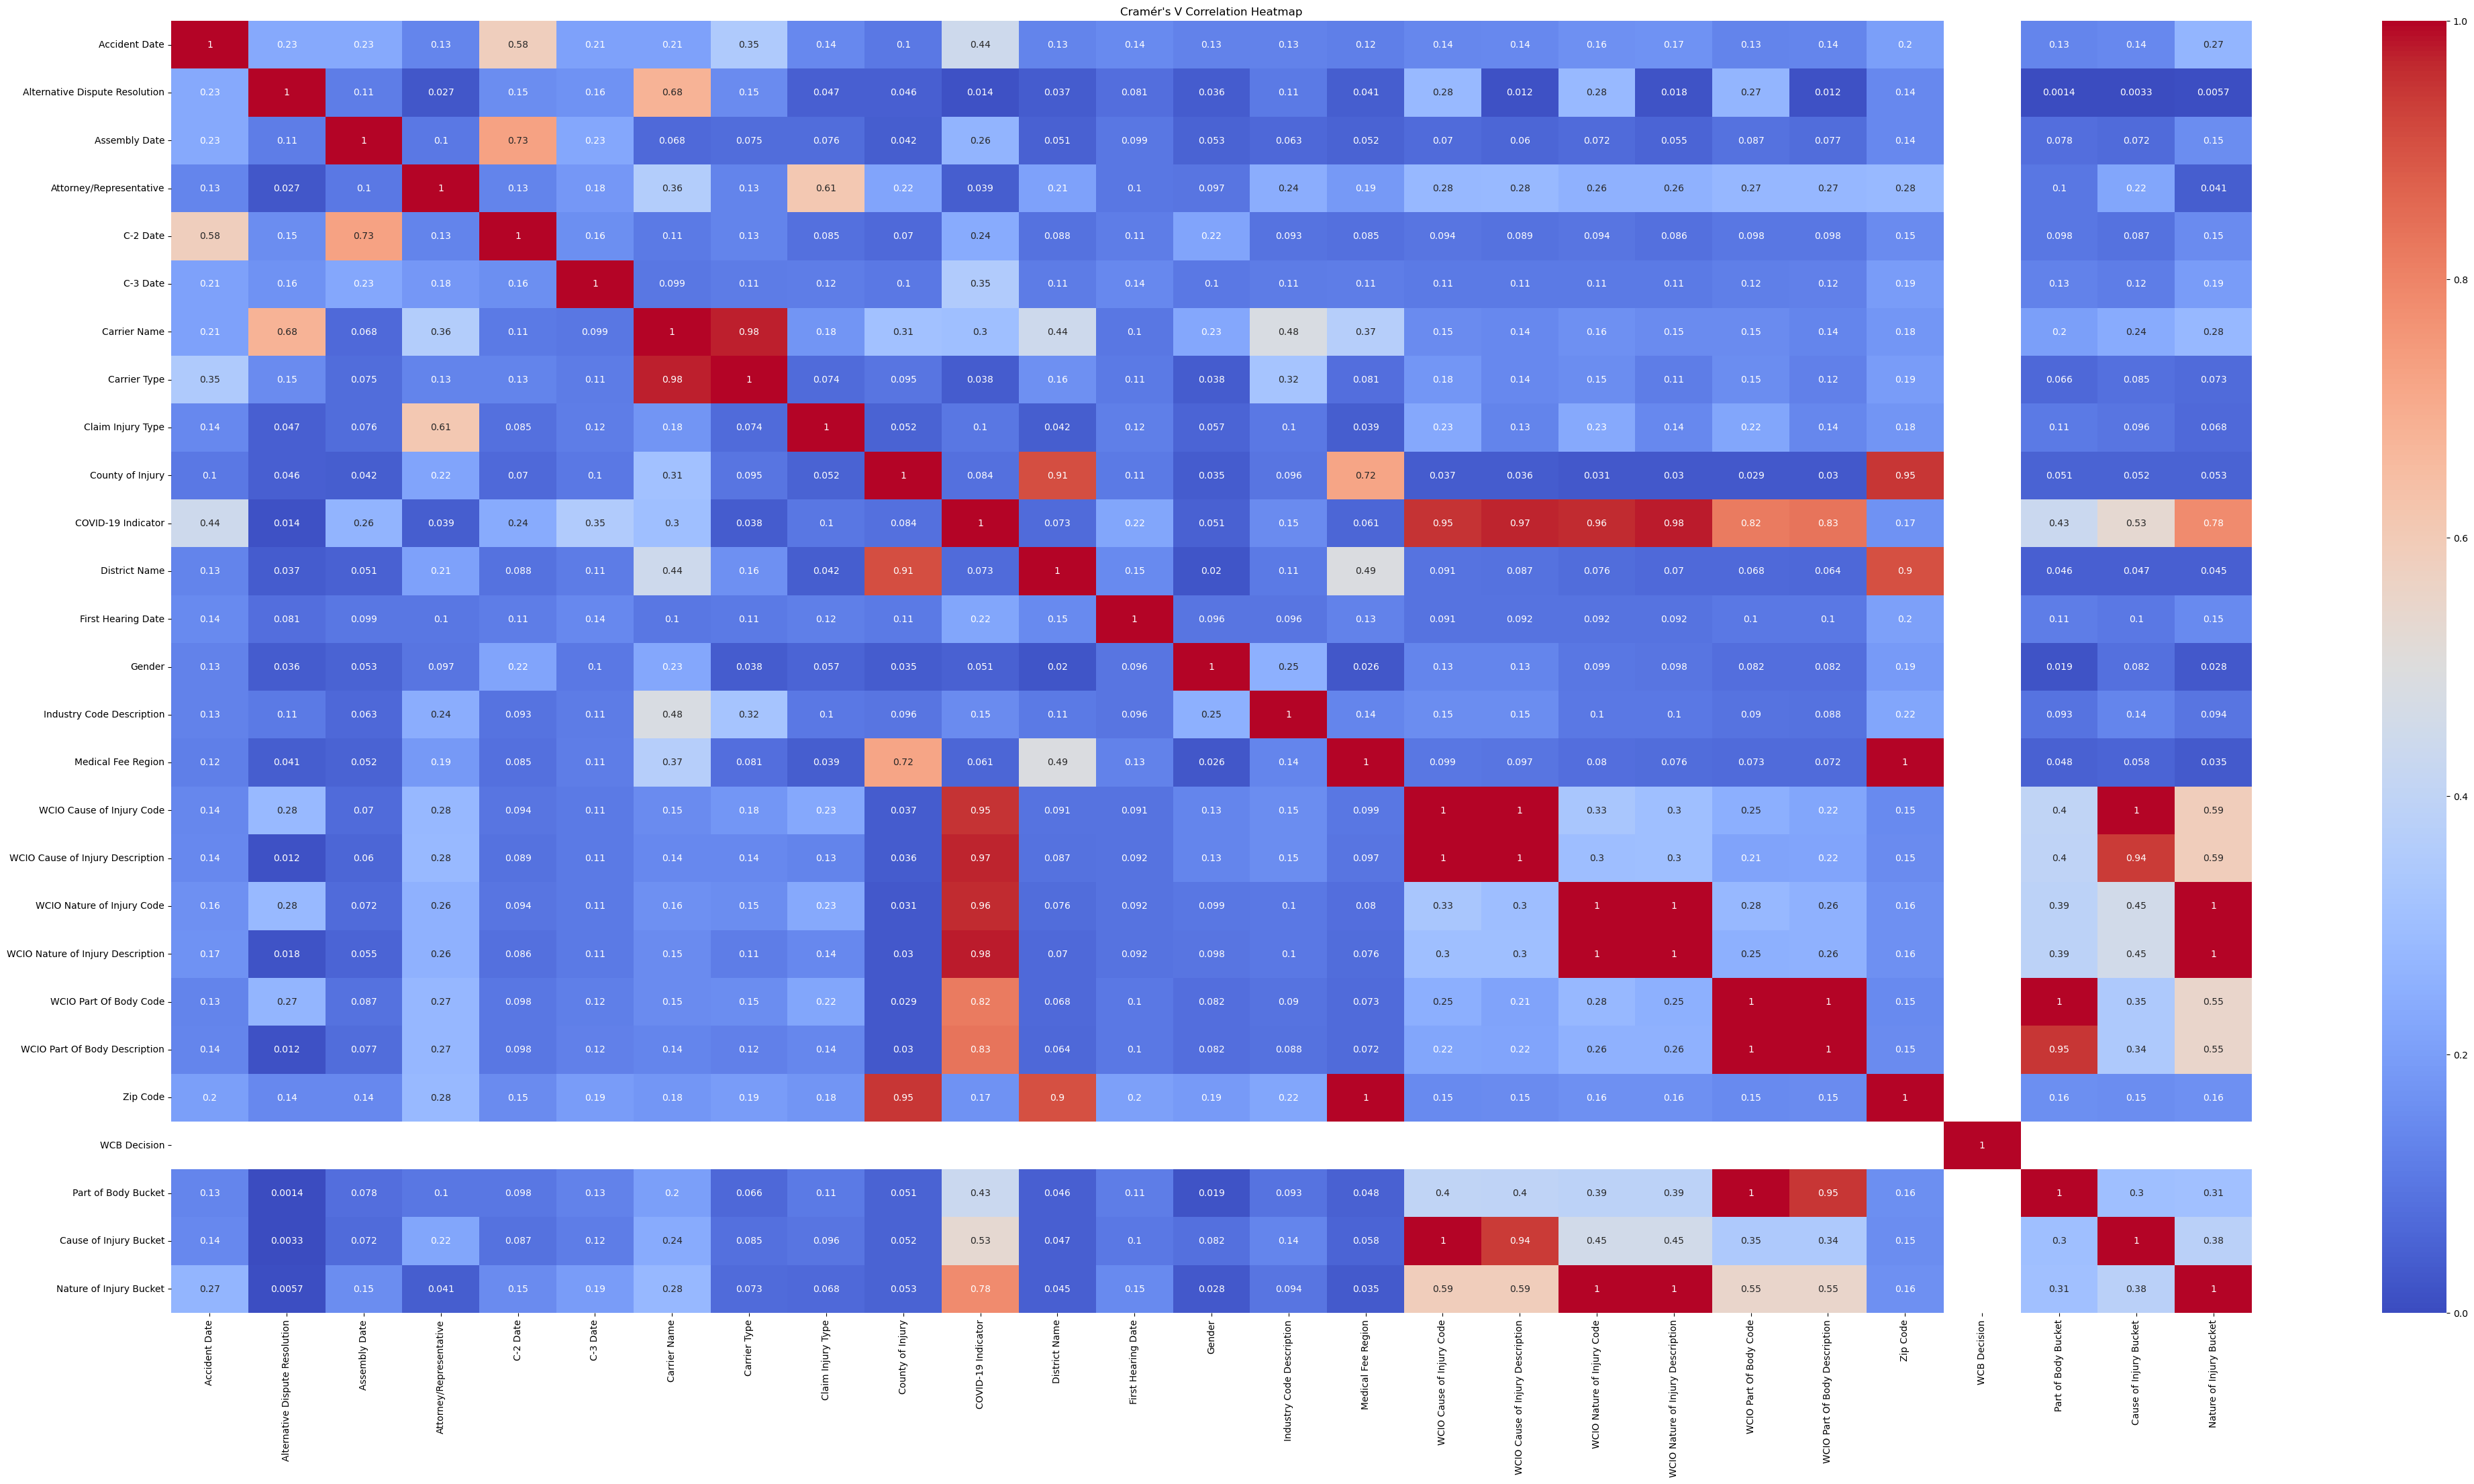

Significant Cramér's V Correlations (|Cramér's V| > 0.8):
                             Feature 1                          Feature 2  \
135                       Carrier Name                       Carrier Type   
190                   County of Injury                      District Name   
201                   County of Injury                           Zip Code   
210                 COVID-19 Indicator          WCIO Cause of Injury Code   
211                 COVID-19 Indicator   WCIO Cause of Injury Description   
212                 COVID-19 Indicator         WCIO Nature of Injury Code   
213                 COVID-19 Indicator  WCIO Nature of Injury Description   
214                 COVID-19 Indicator             WCIO Part Of Body Code   
215                 COVID-19 Indicator      WCIO Part Of Body Description   
230                      District Name                           Zip Code   
276                 Medical Fee Region                           Zip Code   
280          WCIO 

In [91]:
#Code to plot Cramer's V Heatmap and print significant pairs (> .8) (brought to you by: ChatGPT)
# Function to calculate Cramér's V
def cramers_v(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

# Function to compute the Cramér's V matrix for categorical variables
def cramers_v_matrix(df):
    # Select only categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Initialize empty dataframe to hold Cramér's V values
    cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))), 
                                    index=categorical_columns, columns=categorical_columns)
    
    # Loop through each pair of categorical variables
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 == col2:
                cramers_v_matrix.loc[col1, col2] = 1.0  # Set diagonal to 1
            else:
                # Create a contingency table
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                
                # Calculate Cramér's V
                n = contingency_table.sum().sum()  # Total number of observations
                k = min(contingency_table.shape)   # Minimum of number of levels
                cramers_v_value = cramers_v(chi2, n, k)
                
                # Assign Cramér's V value to the matrix
                cramers_v_matrix.loc[col1, col2] = cramers_v_value
                cramers_v_matrix.loc[col2, col1] = cramers_v_value  # Symmetric matrix
    
    return cramers_v_matrix


# Compute Cramér's V matrix
cramers_v_corr_matrix = cramers_v_matrix(train)

# Plotting the heatmap
plt.figure(figsize=(50, 25))
sns.heatmap(cramers_v_corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

#set threshold
threshold = 0.8

# Mask the upper triangle and diagonal of the matrix (since it's symmetric)
mask = np.triu(np.ones(cramers_v_corr_matrix.shape), k=1).astype(bool)

# Use the mask to filter out correlations greater than the threshold
high_corr_pairs = cramers_v_corr_matrix.where(mask).stack().reset_index()

# Filter only significant pairs (where |Cramér's V| > threshold)
high_corr_pairs = high_corr_pairs.loc[high_corr_pairs[0].abs() > threshold]

# Rename columns for clarity
high_corr_pairs.columns = ['Feature 1', 'Feature 2', "Cramér's V"]

# Print the significant pairs
print("Significant Cramér's V Correlations (|Cramér's V| > 0.8):")
print(high_corr_pairs)

### Summary of Findings/Recommendations:

#### From Individual Analysis:
- **Drop WCIO description columns**: These are completely redundant with the corresponding code columns.
- **Leave NAs as NAs**: There is likely predictive information in the fact that the code is missing, so no imputation is recommended.
- **No strange values noted**: No significant outliers or unexpected values were observed.

#### From Correlation Analysis:
- **Drop one of each pair with correlation > 0.8**: Further investigation is needed to determine how to choose which variable to drop.
